# Создание модели МО отбора коров для покупки

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

Описание данных:
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
- `Имя Папы` — имя папы коровы.

Целью работы является разработка модели машинного обучения определения коров, соответствующим критериям, для их покупки.

Исследование разделим на этапы:
- Знакомство с данными
- Предобработка данных
- Исследовательский анализ данных
- Корреляционный анализ
- Обучение модели линейной регрессии
- Обучение модели логистической регрессии

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, 
    accuracy_score, precision_score, recall_score, confusion_matrix)

RANDOM_STATE = 42

## Загрузка данных

In [2]:
df_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

Рассмотрим подробнее датасет df_ferma с информацией о коровах у фермера:

In [3]:
df_ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [4]:
df_ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [5]:
df_ferma.describe()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [6]:
df_ferma.isna().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [7]:
df_ferma.shape

(634, 12)

Таким образом, в df_ferma 634 сточки и 12 признаков. У столбцов `id`, `Удой, кг` и `Сырой протеин, г` тип данных int64, у столбцов `ЭКЕ (Энергетическая кормовая единица)`, `СПО (Сахаро-протеиновое соотношение)`, `Жирность,%` и `Белок,%` - float64, у остальных - object. Пропусков в данных нет.

Рассмотрим подробнее датасет df_dad с информацией об отце-быке каждой коровы.

In [8]:
df_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [9]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [10]:
df_dad.isna().sum()

id          0
Имя Папы    0
dtype: int64

In [11]:
df_dad.shape

(629, 2)

В df_dad 629 строк и 2 признака. Столбец `id` имеет целочисленный тип, `Имя Папы` - тип object. Пропусков в данных нет.

Рассмотрим подробнее датасет df_cow_buy с информацией о коровах "Экофермы".

In [12]:
df_cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [13]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [14]:
df_cow_buy.isna().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

In [15]:
df_cow_buy.shape

(20, 7)

В датасете df_cow_buy 20 строк и 7 признаков. Столбцы `Текущая_жирность,%`, `Текущий_уровень_белок,%` имеют тип float64, остальные - тип object. Пропусков в данных нет.

##  Предобработка данных

Переименуем столбцы датасетов, чтобы привести их в единый вид.

In [16]:
df_ferma.rename(columns={'порода папы_быка': 'Порода папы-быка'}, inplace=True)
df_dad.rename(columns={'Имя Папы': 'Имя папы'}, inplace=True)
df_cow_buy.rename(columns={
    'порода папы_быка': 'Порода папы-быка', 'Имя_папы': 'Имя папы', 
    'Текущая_жирность,%': 'Текущая жирность,%', 'Текущий_уровень_белок,%': 'Текущий уровень белка,%'
}, inplace=True)

In [17]:
df_ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы-быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [18]:
df_ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   Порода папы-быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Исследуем значения в столбцах с неколичественными данными.

In [19]:
for i in ['Порода', 'Тип пастбища', 'Порода папы-быка', 'Вкус молока', 'Возраст']:
    print(f'{i} : {df_ferma[i].unique()}')
    print('_ _' * 20)

Порода : ['Вис Бик Айдиал' 'РефлешнСоверинг']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Тип пастбища : ['Равнинное' 'Равнинные' 'Холмистое']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Порода папы-быка : ['Айдиал' 'Соверин' 'Айдиалл']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Вкус молока : ['вкусно' 'не вкусно']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Возраст : ['более_2_лет' 'менее_2_лет']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


Видим повторы в столбцах тип пастбища и порода папы-быка. Переименуем их, поправим название породы Рефлешн Соверинг, а также приведем значения в единый вид во всех столбцах.

In [20]:
df_ferma['Тип пастбища'] = df_ferma['Тип пастбища'].str.replace('Равнинные', 'Равнинное')
df_ferma['Порода папы-быка'] = df_ferma['Порода папы-быка'].str.replace('Айдиалл', 'Айдиал')
df_ferma['Порода'] = df_ferma['Порода'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')
df_ferma['Вкус молока'] = df_ferma['Вкус молока'].str.capitalize()
df_ferma['Возраст'] = df_ferma['Возраст'].str.capitalize()

Заново исследуем значения в столбцах с неколичественными данными.

In [21]:
for i in ['Порода', 'Тип пастбища', 'Порода папы-быка', 'Вкус молока', 'Возраст']:
    print(f'{i} : {df_ferma[i].unique()}')
    print('_ _' * 20)

Порода : ['Вис Бик Айдиал' 'Рефлешн Соверинг']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Тип пастбища : ['Равнинное' 'Холмистое']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Порода папы-быка : ['Айдиал' 'Соверин']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Вкус молока : ['Вкусно' 'Не вкусно']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Возраст : ['Более_2_лет' 'Менее_2_лет']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


Также проверим датасет df_ferma на наличие полных строк-дубликатов.

In [22]:
df_ferma.duplicated().sum()

5

Удалим 5 строчек-дубликатов из нашего датасета.

In [23]:
df_ferma.drop_duplicates(inplace=True)
df_ferma

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы-быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,Вкусно,Более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,Вкусно,Менее_2_лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,Не вкусно,Более_2_лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,Не вкусно,Более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,Вкусно,Менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,Рефлешн Соверинг,Равнинное,Айдиал,3.74,3.075,Не вкусно,Более_2_лет
625,626,5513,12.9,1700,0.880,Рефлешн Соверинг,Равнинное,Соверин,3.64,3.073,Вкусно,Менее_2_лет
626,627,5970,14.4,1837,0.880,Рефлешн Соверинг,Холмистое,Соверин,3.64,3.075,Не вкусно,Более_2_лет
627,628,5746,13.8,1994,0.890,Рефлешн Соверинг,Равнинное,Соверин,3.64,3.077,Вкусно,Более_2_лет


Проверим, чтобы значение в столбце `id` не повторялось.

In [24]:
df_ferma['id'].value_counts()

1      1
424    1
417    1
418    1
419    1
      ..
211    1
212    1
213    1
214    1
629    1
Name: id, Length: 629, dtype: int64

Все значения `id` уникальны, следовательно, с данными все в порядке.

Рассмотрим подробнее датасет df_dad.

In [25]:
df_dad.head()

,id,Имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Рассморим уникальные значения в столбце `Имя Папы`.

In [26]:
df_dad['Имя папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

С данными все в порядке, нет никаких повторов и значение приведены в единый вид.

Выясним, есть ли строки-дубликаты в датасете df_dad.

In [27]:
df_dad.duplicated().sum()

0

Дубликатов нет.


Рассмотрим подробнее датасет df_cow_buy.

In [28]:
df_cow_buy.head()

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Текущая жирность,%","Текущий уровень белка,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Исследуем уникальные значения в столбцах с неколичественными данными.

In [29]:
for i in ['Порода', 'Тип пастбища', 'Порода папы-быка', 'Имя папы', 'Возраст']:
    print(f'{i} : {df_cow_buy[i].unique()}')
    print('_ _' * 20)

Порода : ['Вис Бик Айдиал' 'РефлешнСоверинг']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Тип пастбища : ['холмистое' 'равнинное']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Порода папы-быка : ['Айдиал' 'Соверин']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Имя папы : ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Возраст : ['более_2_лет' 'менее_2_лет']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


Поправим название породы Рефлешн Соверинг, а также приведем значения в единый вид во всех столбцах.

In [30]:
df_cow_buy['Порода'] = df_cow_buy['Порода'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')
df_cow_buy['Тип пастбища'] = df_cow_buy['Тип пастбища'].str.capitalize()
df_cow_buy['Возраст'] = df_cow_buy['Возраст'].str.capitalize()

Заново исследуем уникальные значения в столбцах с неколичественными данными.

In [31]:
for i in ['Порода', 'Тип пастбища', 'Порода папы-быка', 'Имя папы', 'Возраст']:
    print(f'{i} : {df_cow_buy[i].unique()}')
    print('_ _' * 20)

Порода : ['Вис Бик Айдиал' 'Рефлешн Соверинг']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Тип пастбища : ['Холмистое' 'Равнинное']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Порода папы-быка : ['Айдиал' 'Соверин']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Имя папы : ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Возраст : ['Более_2_лет' 'Менее_2_лет']
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


**Вывод:**
Таким образом, в результате предобработки данных были выполнены следующие действия:
- в датасете *df_ferma* был переименован столбец `порода папы_быка`;
- в датасете *df_cow_buy* были переименованы столбцы `порода папы_быка`, `Имя_папы`, `Текущая_жирность,%`, `Текущий_уровень_белок,%`;
- столбцы `ЭКЕ (Энергетическая кормовая единица)`, `СПО (Сахаро-протеиновое соотношение)`, `Жирность,%`, `Белок,%` датасета *df_ferma* были приведены к типу данных с плавающей точкой;
- в датасете *df_ferma* были переименованы значения к столбцах `Тип пастбища`, `Порода папы-быка`, `Порода`. А также отформатированы значения в столбцах `Вкус молока` и `Возраст`.
- из датасета *df_ferma* были удалены 5 строчек-дубликатов;
- столбцы `Текущая жирность,%`, `Текущий уровень белка,%` датасета *df_cow_buy* были приведены к типу данных с плавающей точкой;
- в датасете *df_cow_buy* были переименованы значения в столбце `Порода`, а также форматированы значения в столбцах `Тип пастбища` и `Возраст`.

## Исследовательский анализ данных

Рассмотрим датасет df.

In [32]:
df_ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы-быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,Вкусно,Более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,Вкусно,Менее_2_лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,Не вкусно,Более_2_лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,Не вкусно,Более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,Вкусно,Менее_2_лет


Рассмотрим подробнее признак `Удой, кг` датасета df_ferma.

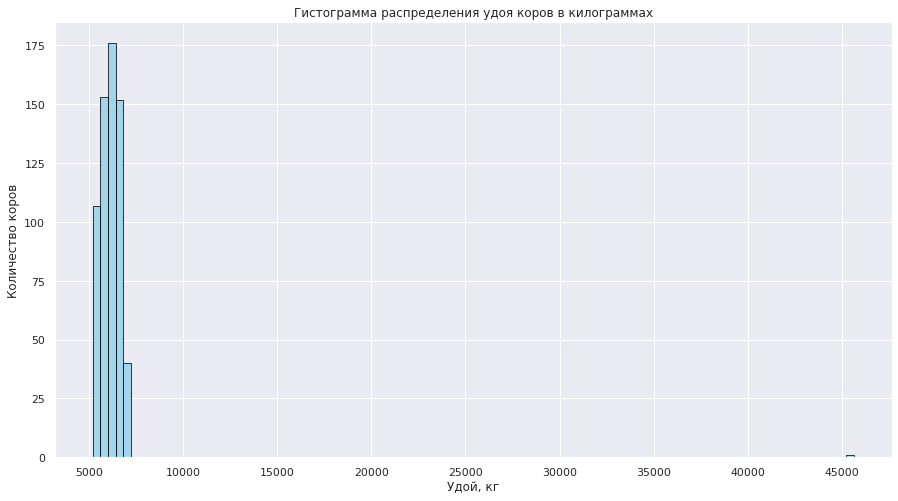

In [33]:
sns.set_theme()
plt.figure(figsize=(15, 8))
sns.histplot(data=df_ferma['Удой, кг'], bins=100, color='skyblue', edgecolor='black')
plt.title('Гистограмма распределения удоя коров в килограммах')
plt.xlabel('Удой, кг')
plt.ylabel('Количество коров');

Видим аномальные значения, рассмотрим их подробнее.

In [34]:
df_ferma[df_ferma['Удой, кг'] > 7500]

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы-быка,"Жирность,%","Белок,%",Вкус молока,Возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,Вкусно,Более_2_лет


Всего одна строка оказалось выше 7500, избавимся от неё и заново построим гистограмму.

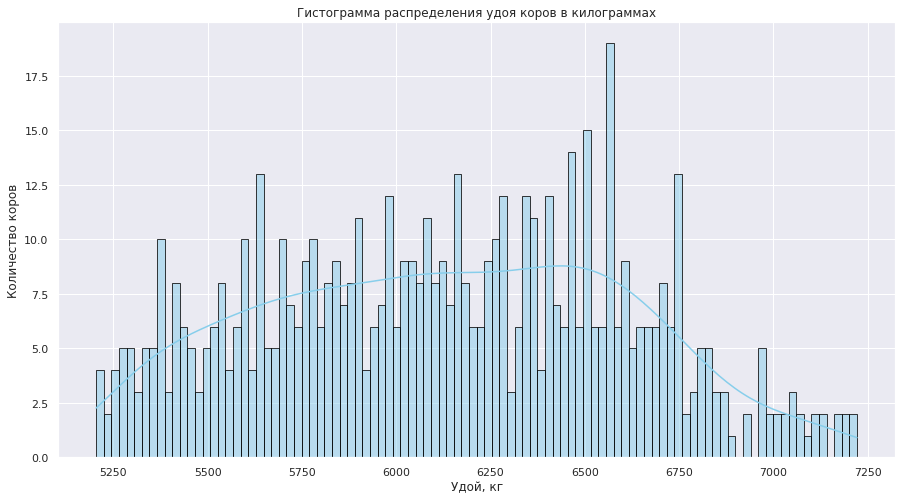

In [35]:
df_ferma = df_ferma[df_ferma['Удой, кг'] <= 7500]
plt.figure(figsize=(15, 8))
sns.histplot(data=df_ferma['Удой, кг'], bins=100, color='skyblue', edgecolor='black', kde=True)
plt.title('Гистограмма распределения удоя коров в килограммах')
plt.xlabel('Удой, кг')
plt.ylabel('Количество коров');

Видим, что распределение не имеет нормальный характер.

Рассмотрим признак `ЭКЕ (Энергетическая кормовая единица)`. 

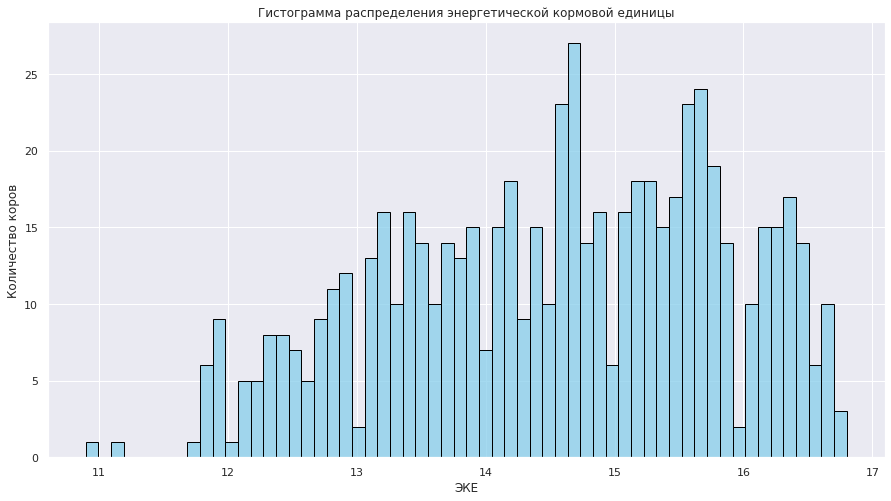

In [36]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_ferma['ЭКЕ (Энергетическая кормовая единица)'], bins=60, color='skyblue', edgecolor='black')
plt.title('Гистограмма распределения энергетической кормовой единицы')
plt.xlabel('ЭКЕ')
plt.ylabel('Количество коров');

Видим, два выбивающихся значений слева, рассмотрим подробнее.

In [37]:
df_ferma[df_ferma['ЭКЕ (Энергетическая кормовая единица)'] < 11.5]

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы-быка,"Жирность,%","Белок,%",Вкус молока,Возраст
456,457,5288,11.1,1925,0.88,Рефлешн Соверинг,Равнинное,Соверин,3.33,3.074,Не вкусно,Менее_2_лет
581,582,5573,10.9,1955,0.84,Вис Бик Айдиал,Холмистое,Соверин,3.39,3.079,Вкусно,Менее_2_лет


Избавимся от этих значений. и заново построим гистограмму.

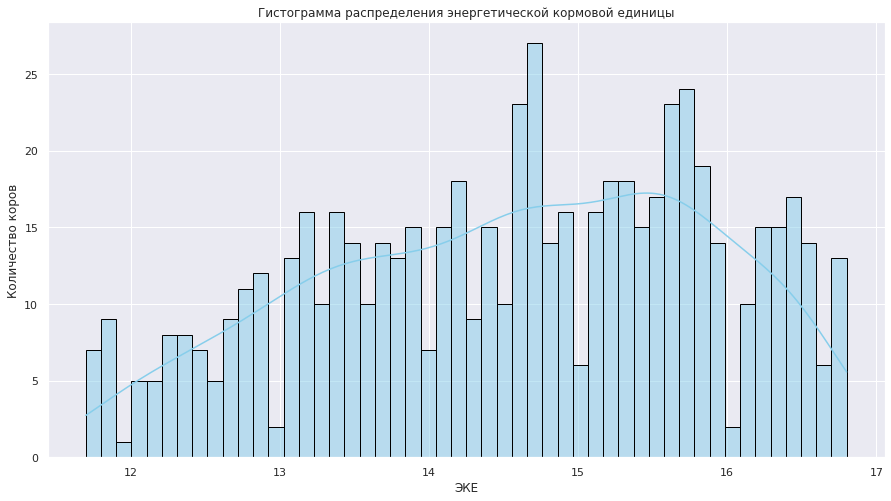

In [38]:
df_ferma = df_ferma[df_ferma['ЭКЕ (Энергетическая кормовая единица)'] >= 11.5]

plt.figure(figsize=(15, 8))
sns.histplot(data=df_ferma['ЭКЕ (Энергетическая кормовая единица)'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Гистограмма распределения энергетической кормовой единицы')
plt.xlabel('ЭКЕ')
plt.ylabel('Количество коров');

Рассмотрим признак `Сырой протеин, г` датасета df.

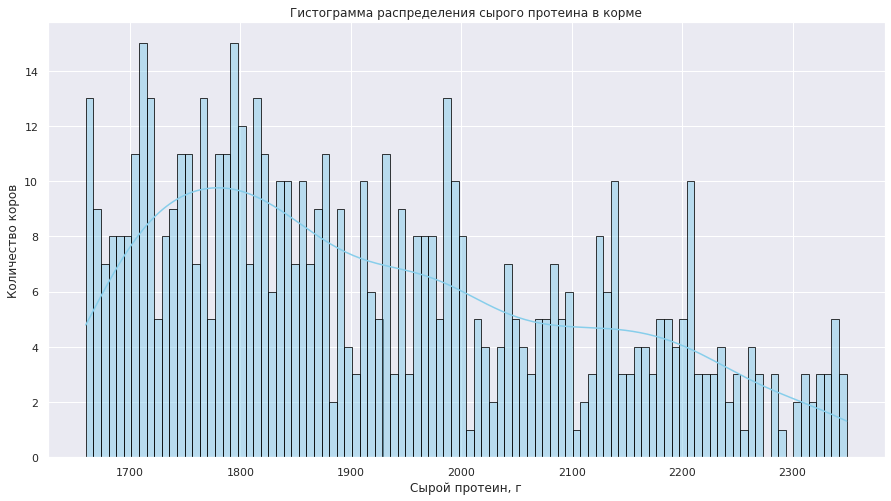

In [39]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_ferma['Сырой протеин, г'], bins=100, color='skyblue', edgecolor='black', kde=True)
plt.title('Гистограмма распределения сырого протеина в корме')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Количество коров');

Рассмотрим признак `СПО (Сахаро-протеиновое соотношение)` датасета df.

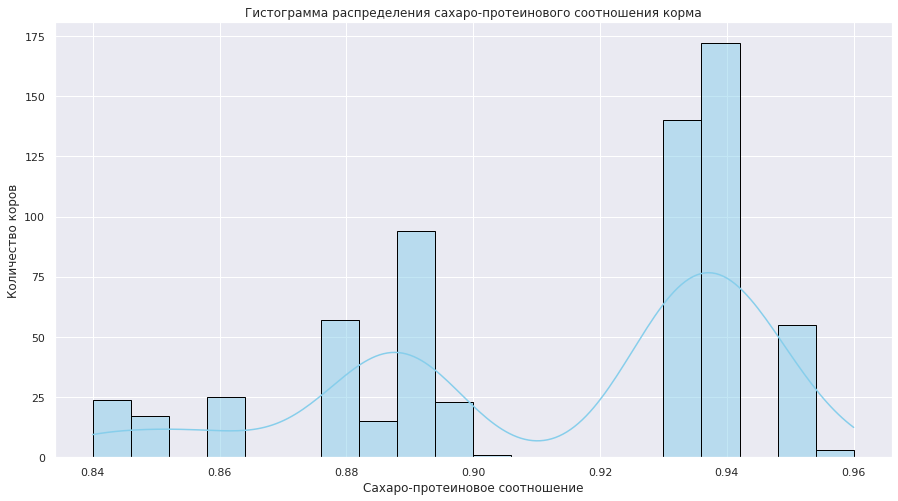

In [40]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_ferma['СПО (Сахаро-протеиновое соотношение)'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Гистограмма распределения cахаро-протеинового соотношения корма')
plt.xlabel('Сахаро-протеиновое соотношение')
plt.ylabel('Количество коров');

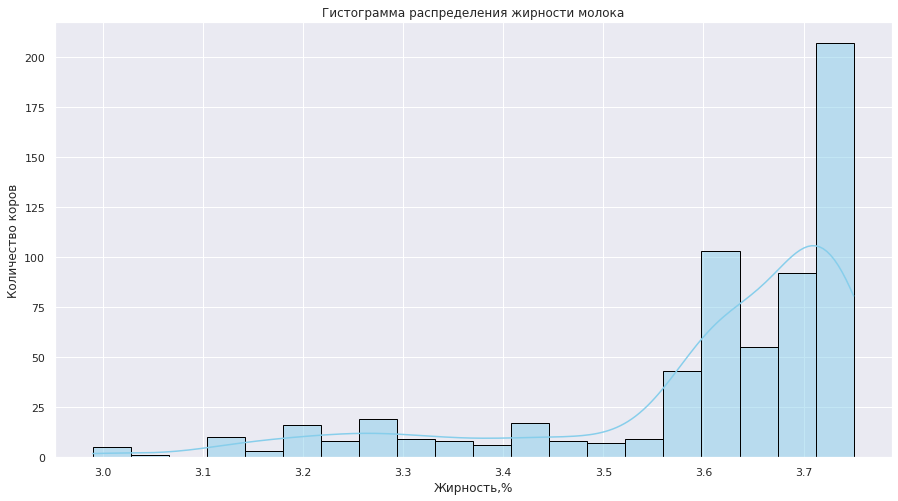

In [41]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_ferma['Жирность,%'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Гистограмма распределения жирности молока')
plt.xlabel('Жирность,%')
plt.ylabel('Количество коров');

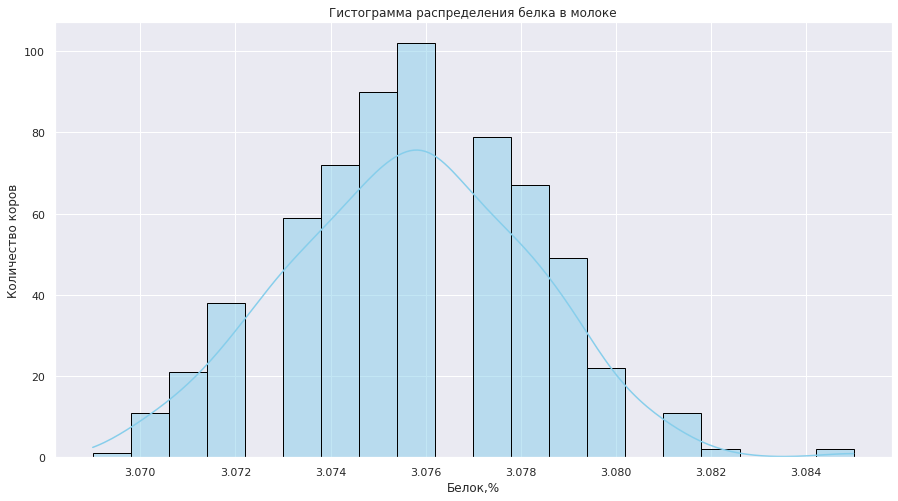

In [42]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_ferma['Белок,%'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Гистограмма распределения белка в молоке')
plt.xlabel('Белок,%')
plt.ylabel('Количество коров');

In [43]:
df_ferma.drop('id', axis=1).describe()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,6128.190096,14.560064,1923.707668,0.913259,3.605048,3.075668
std,474.917735,1.288249,183.120837,0.032112,0.167783,0.002551
min,5204.000000,11.700000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1771.250000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1885.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.750000,0.940000,3.720000,3.077000
max,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


- **Удой, кг**:
    - Данные распределены не нормально, скошены вправо;
    - Среднее значение - 6128,2 кг, стандартное отклонение - 474,9 кг, что говорит о большом разбросе;
    - Минимальное значение - 5204 кг, максимальное - 7222 кг;
    - Медиана равна 6133 кг;
    - 1 квартиль равен - 6133 кг, 3 квартиль - 6501 кг.
- **ЭКЕ (Энергетическая кормовая единица)**:
    - Данные распределены по нарастающей;
    - Среднее значение - 14,6 ед., станд.отклонение - 1,3 ед;
    - Минимальное значение в данных 11,7 ед., максимальное - 16,8 ед, медиана - 14,7 ед;
    - 1 квартиль равен 13,5 ед., 3 квартиль равен 15,6 ед.
- **Сырой протеин, г**:
    - Данные распредены по убывающей;
    - Среднее значение - 1923,7 г, станд.отклонение - 183,1 г;
    - Минимальное значение в данных 1660 г, максимальное - 2349 г, медиана - 1885,5 г;
    - 1 квартиль равен 1771,3 г, 3 квартиль равен 2062,8 г.
- **СПО (Сахаро-протеиновое соотношение)**:
    - Распредение имеет два пика;
    - Среднее значение - 0,91 д.ед, станд.отклонение - 0,03 д.ед.;
    - Минимальное значение в данных 0,84 д.ед, максимальное - 0,96 д.ед, медиана - 0,93 д.ед.;
    - 1 квартиль равен 0,89 д.ед, 3 квартиль равен 0,94 д.ед..
- **Жирность,%**:
    - У распределения длинный "хвост" слева;
    - Среднее значение - 3,6 %, станд.отклонение - 0,2 %;
    - Минимальное значение в данных 3 %, максимальное - 3,75 %, медиана - 3,65 %;
    - 1 квартиль равен 3,6 %, 3 квартиль равен 3,72 %.
- **Белок,%**:
    - Распределение имеет нормальный вид;
    - Среднее значение - 3,076 %, станд.отклонение - 0,003 %;
    - Минимальное значение в данных 3,07 %, максимальное - 3,085 %, медиана - 3,076 %;
    - 1 квартиль равен 3,074 %, 3 квартиль равен 3,077 %.

Графики для неколичественных переменных построим с помощью цикла. Для этого сначала список с названиями столбцов с неколичественными переменными, а затем передадим этот список циклу.

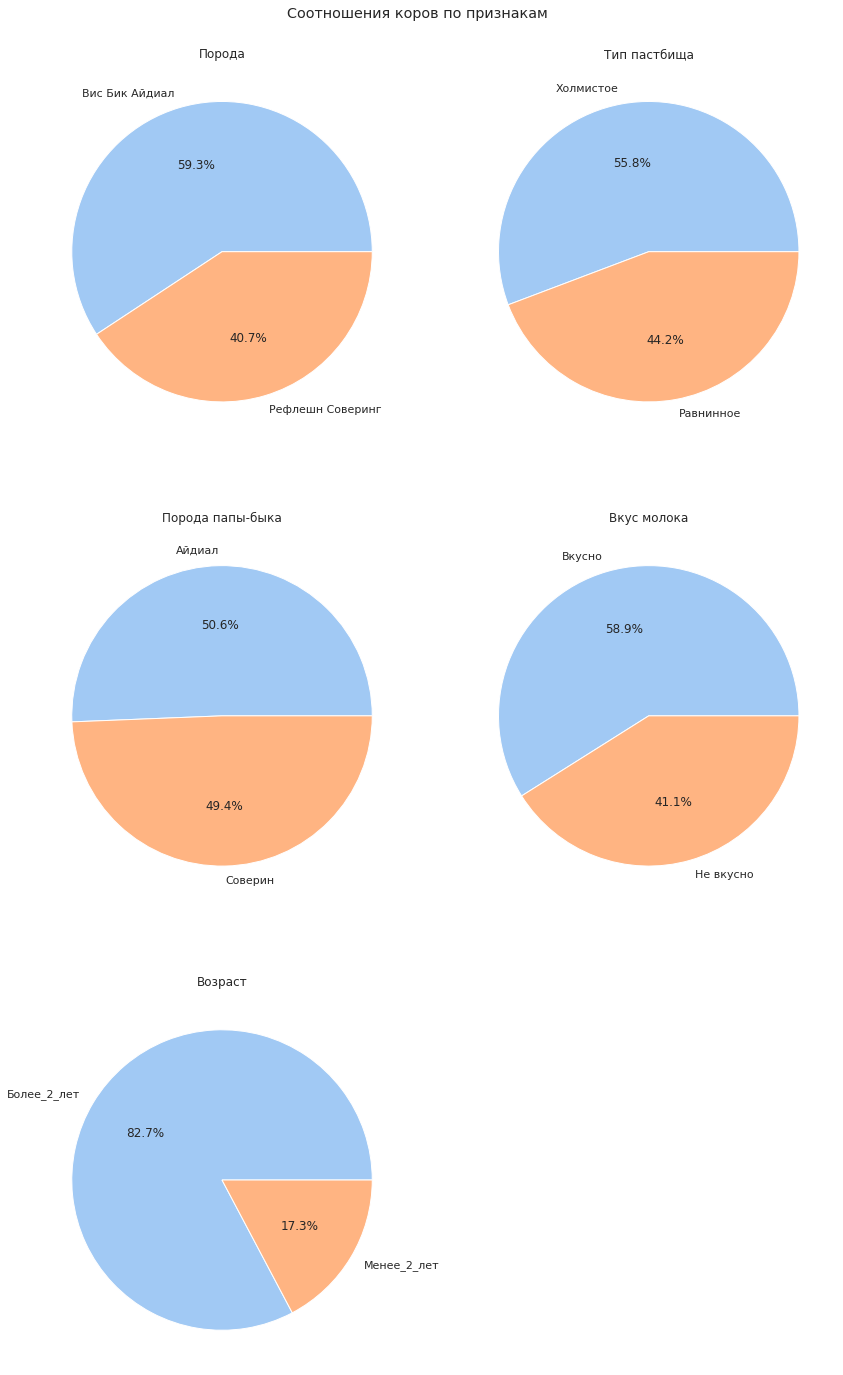

In [44]:
non_num_col = [x for x in df_ferma.columns if x not in df_ferma.describe().columns]
palette_color = sns.color_palette('pastel')
fig, axes = plt.subplots(3, 2, figsize=(12, 20))
plt.suptitle('Соотношения коров по признакам')
axe = axes.ravel()
for i, column in enumerate(non_num_col):
    df_ferma[column].value_counts().plot(kind='pie', ax=axe[i], colors=palette_color, autopct='%.1f%%', ylabel='')
    axe[i].set_title(column)
axes[2][1].set_visible(False)
fig.tight_layout();

- **Порода** : В стаде фермера чуть больше 40% коровы породой Рефлешн Соверинг, а остальные Вис Бик Айдиал.
- **Тип пастбища** : В стаде фермера около 55,8% коров пасутся на холмистом пастбище, а остальные на равнинном.
- **Порода папы-быка** : В стаде фермера 55.6% коров у которых порода отца Соверин, у остальных Айдиал.
- **Вкус молока** : В стаде фермера 58,9% коров дают вкусное молоко, остальные невкусное.
- **Возраст** : В стаде фермера 82,7% коровы старше 2-х лет.

Рассмотрим датасет df_dad.

In [45]:
df_dad.head()

,id,Имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


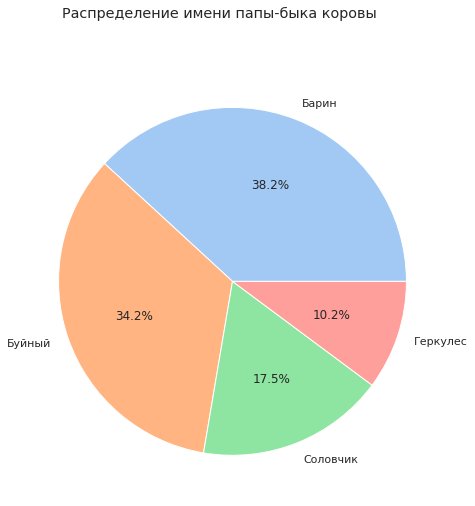

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = df_dad['Имя папы'].value_counts().plot(kind='pie',colors=palette_color, autopct='%.1f%%')
ax.set_ylabel('')
plt.suptitle('Распределение имени папы-быка коровы');

- **Имя папы-быка** : В стаде фермера у 38,2% коров имя папы-быка - Барин, у 34,2% - Буйный, у 17,5% - Соловчик и у 10,2% - Геркулес.

Рассмотрим датасет df_cow_buy.

In [47]:
df_cow_buy

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Текущая жирность,%","Текущий уровень белка,%",Возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее_2_лет
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Более_2_лет
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Более_2_лет
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,Менее_2_лет
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,Более_2_лет
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,Менее_2_лет


In [48]:
df_cow_buy.describe()

,"Текущая жирность,%","Текущий уровень белка,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Рассмотрим столбец `Текущая жирность,%` датасета df_cow_buy.

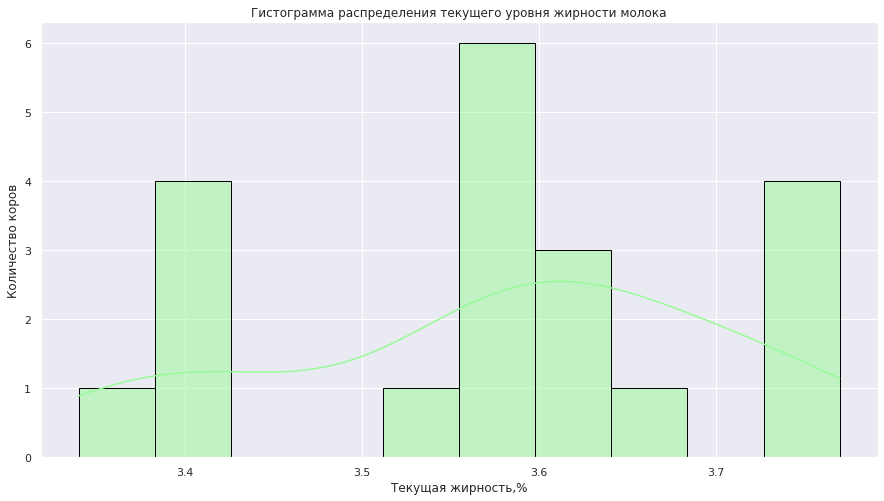

In [49]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_cow_buy['Текущая жирность,%'], bins=10, color='palegreen', edgecolor='black', kde=True)
plt.title('Гистограмма распределения текущего уровня жирности молока')
plt.xlabel('Текущая жирность,%')
plt.ylabel('Количество коров');

Рассмотрим столбец `Текущий уровень белка,%` датасета df_cow_buy.

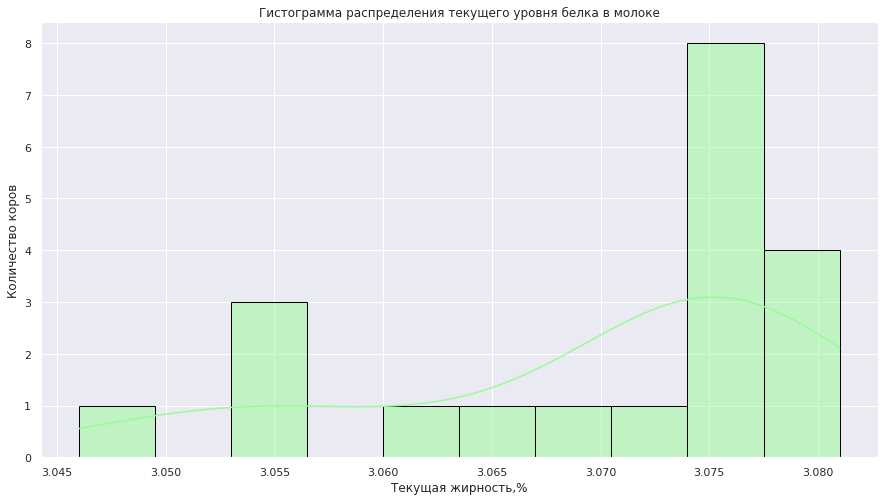

In [50]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_cow_buy['Текущий уровень белка,%'], bins=10, color='palegreen', edgecolor='black', kde=True)
plt.title('Гистограмма распределения текущего уровня белка в молоке')
plt.xlabel('Текущая жирность,%')
plt.ylabel('Количество коров');

In [51]:
df_cow_buy.describe()

,"Текущая жирность,%","Текущий уровень белка,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


- **Текущая жирность,%**:
    - Среднее значение - 3,58 %, станд.отклонение - 0,13 %;
    - Минимальное значение в данных 3,34 %, максимальное - 3,77 %, медиана - 3,59 %;
    - 1 квартиль равен 3,51 %, 3 квартиль равен 3,65 %.
- **Текущий уровень белка,%**:
    - Среднее значение - 3,07 %, станд.отклонение - 0,01 %;
    - Минимальное значение в данных 3,05 %, максимальное - 3,08 %, медиана - 3,07 %;
    - 1 квартиль равен 3,06 %, 3 квартиль равен 3,08 %.

Построим частотные диаграммы для всех столбцов с неколичественными данными в датасете df_cow_buy.

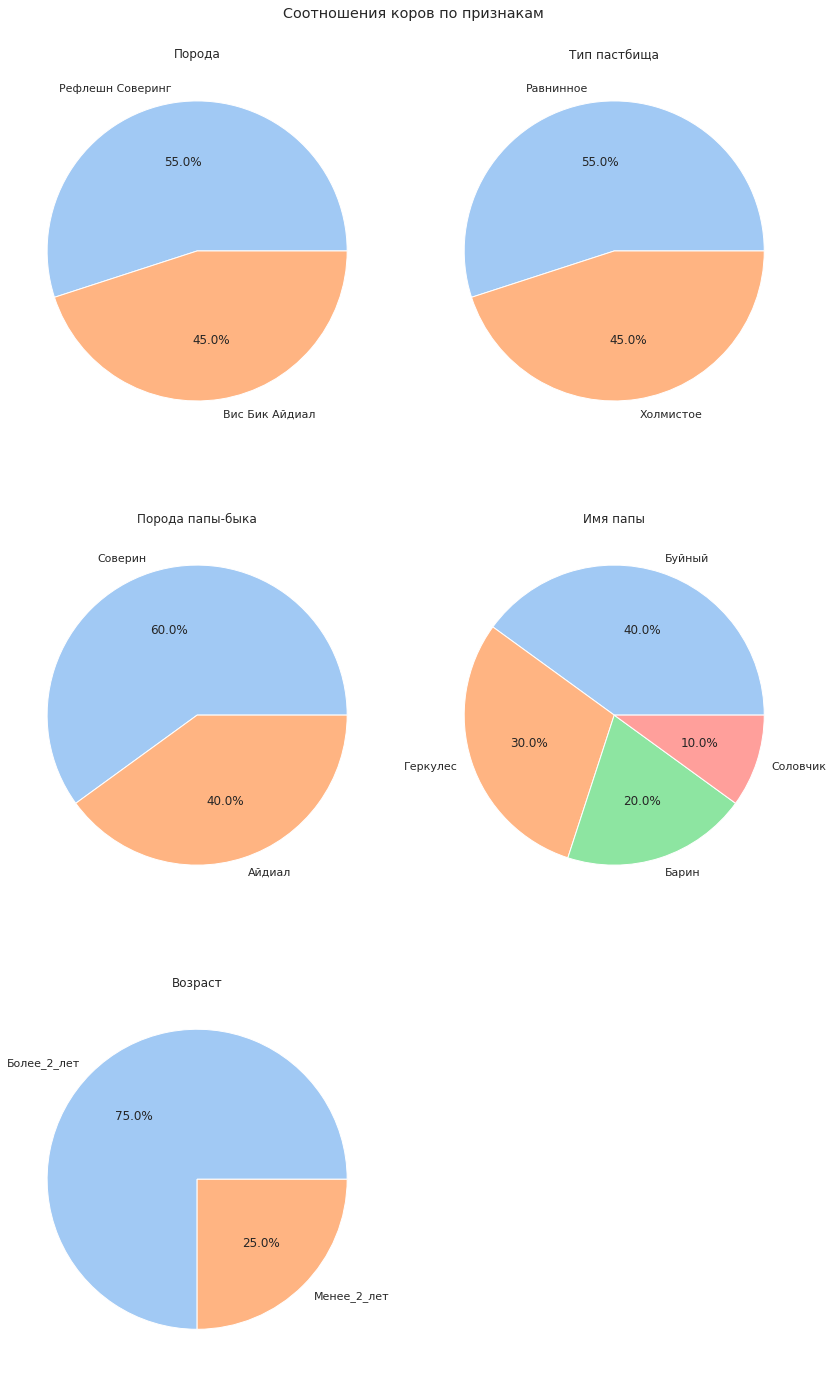

In [52]:
non_num_col = [x for x in df_cow_buy.columns if x not in df_cow_buy.describe().columns]
fig, axes = plt.subplots(3, 2, figsize=(12, 20))
plt.suptitle('Соотношения коров по признакам')
axe = axes.ravel()
for i, column in enumerate(non_num_col):
    df_cow_buy[column].value_counts().plot(kind='pie', ax=axe[i], colors=palette_color, autopct='%.1f%%', ylabel='')
    axe[i].set_title(column)
axes[2][1].set_visible(False)
fig.tight_layout();

- **Порода** : В стаде «ЭкоФермы» 55% коров породы Рефлешн Соверинг, остальные - Вис Бик Айдиал.
- **Тип пастбища** : В стаде «ЭкоФермы» 55% коров пасутся на равнинном пастбище, а остальные - на холмистом.
- **Порода папы-быка** : В стаде «ЭкоФермы» 60% коров, у которых порода отца Соверин, у остальных Айдиал.
- **Имя папы** : В стаде «ЭкоФермы» у 40% коров имя папы-быка - Буйный, у 30% - Геркулес, у 20% - Барин и у 10% - Соловчик.
- **Возраст** : В стаде «ЭкоФермы» 75% коровы старше 2-х лет.

## Корреляционный анализ

In [53]:
df_ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы-быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,Вкусно,Более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,Вкусно,Менее_2_лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,Не вкусно,Более_2_лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,Не вкусно,Более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,Вкусно,Менее_2_лет


Рассчитаем коэффициенты корреляции Пирсона для всех количественных признаков датасета df_ferma, исключая `id`.

In [54]:
df_ferma.drop('id', axis=1).corr().round(3)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
"Удой, кг",1.000,0.764,0.449,0.806,0.598,0.004
ЭКЕ (Энергетическая кормовая единица),0.764,1.000,0.393,0.747,0.634,-0.006
"Сырой протеин, г",0.449,0.393,1.000,0.449,0.359,0.227
СПО (Сахаро-протеиновое соотношение),0.806,0.747,0.449,1.000,0.627,0.078
"Жирность,%",0.598,0.634,0.359,0.627,1.000,-0.026
"Белок,%",0.004,-0.006,0.227,0.078,-0.026,1.000


Построим тепловую карту по полученным значениям корреляции.

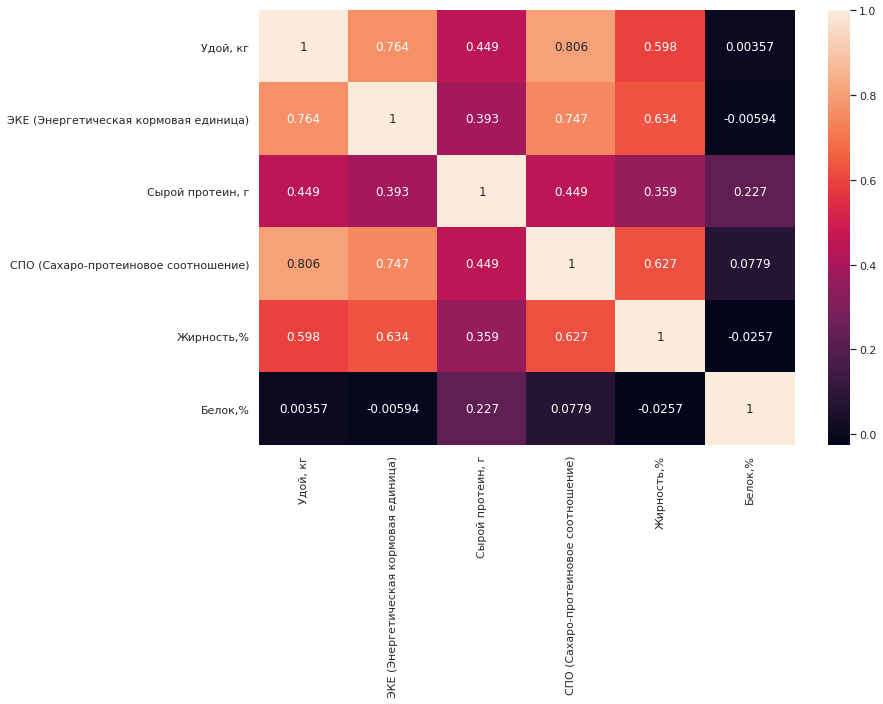

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(data=df_ferma.drop('id', axis=1).corr(), annot=True,fmt='.3g')

По тепловой карте можем сделать вывод, что по шкале Чеддока:

1. **высокая** корреляция наблюдается между признаками:
    - `Удой, кг` и `СПО (Сахаро-протеиновое соотношение)` - **0,806**;
    - `Удой, кг` и `ЭКЕ (Энергетическая кормовая единица)` - **0,764**;
    - `ЭКЕ (Энергетическая кормовая единица)` и `СПО (Сахаро-протеиновое соотношение)` - **0,747**.
    
2. **средняя** корреляция наблюается между признаками:
    - `Жирность,%` и `ЭКЕ (Энергетическая кормовая единица)` - **0,634**;
    - `Жирность,%` и `СПО (Сахаро-протеиновое соотношение)` - **0,627**;
    - `Удой, кг` и `Жирность,%` - **0,598**.
    
3. **слабая** корреляция наблюдается между признаками:
    - `Удой, кг` и `Сырой протеин, г` - **0,449**;
    - `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` - **0,449**;
    - `Сырой протеин, г` и `ЭКЕ (Энергетическая кормовая единица)` - **0,393**;
    - `Сырой протеин, г` и `Жирность,%` - **0,359**.
    
4. **очень слабая** корреляция наблюдается между признаками:
    - `Сырой протеин, г` и `Белок,%` - **0,227**;
    - `СПО (Сахаро-протеиновое соотношение)` и `Белок,%` - **0,0779**;
    - `Жирность,%` и `Белок,%` - **-0,0257**;
    - `ЭКЕ (Энергетическая кормовая единица)` и `Белок,%` - **-0,00594**;
    - `Удой, кг` и `Белок,%` - **0,00357**.

Создадим функцию ***udoi_scatter***, принимающую количественный признак, для построения диаграммы рассеяния с признаком `Удой, кг` и неколичественный признак для группировки полученных точек, а также порядковый номер диаграммы.

In [56]:
def udoi_scatter(num, non_num, i):
    sns.scatterplot(data=df_ferma, x='Удой, кг', y=num, hue=non_num, ax=axs[i])
    axs[i].set_title('Диаграмма рассеяния')

С помощью цикла построим все возможные варианты диаграмм рассеяния с признаком `Удой, кг`.

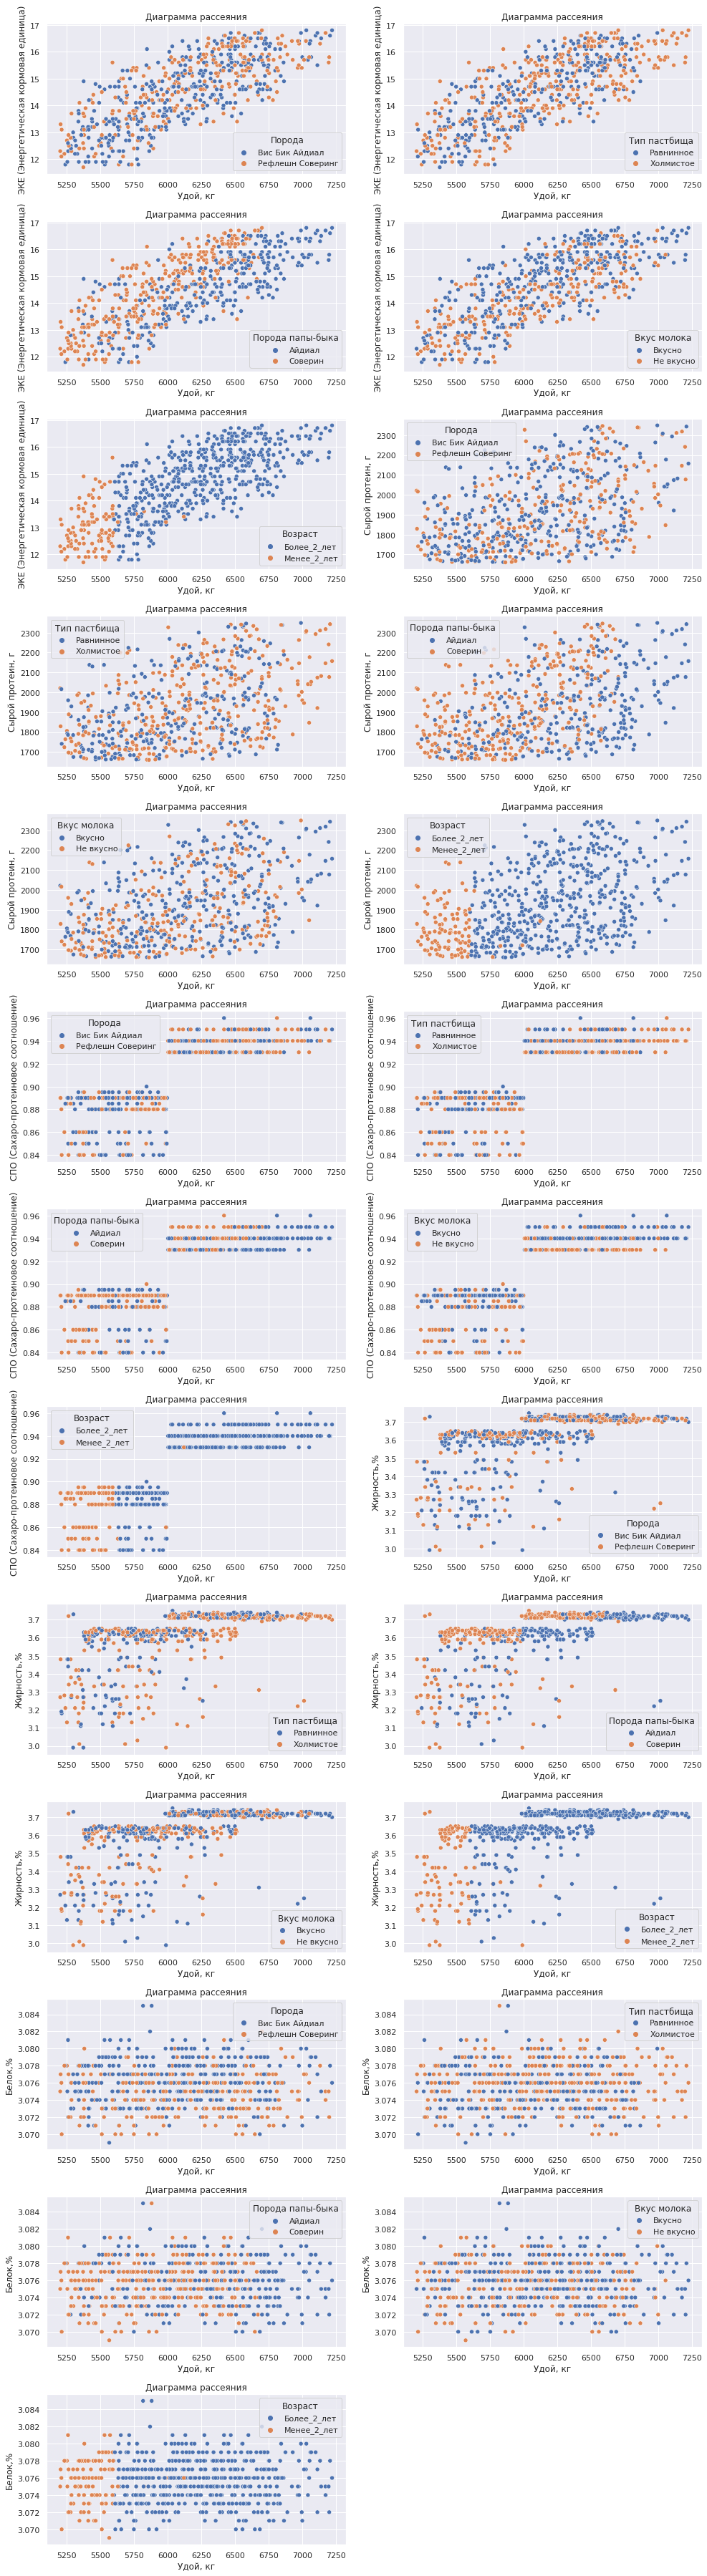

In [57]:
ferma_non_num_col = [
    x for x in df_ferma.columns if x not in df_ferma.describe().columns] # создаем список всех неколич. признаков df_ferma
ferma_num_col = df_ferma.describe().columns[2:] # создаем список всех колич. признаков df_ferma, за исключением id и Удой, кг
fig, axes = plt.subplots(13, 2, figsize=(14, 50)) 
axs = axes.ravel()
for i in range(len(ferma_num_col)):
    for j in range(len(ferma_non_num_col)):
        udoi_scatter(ferma_num_col[i], ferma_non_num_col[j], 5*i+j)
axes[12][1].set_visible(False)
fig.tight_layout()

По диаграммам рассеяния можем сделать вывод, что:
- Коровы с возрастом менее 2 лет имеют уровень удоя, который в среднем ниже 5600 кг молока.
- Коровы, пасущиеся на холмистых пастбищах, чаще имеют уровень удоя, близкий к максимальному количеству.
- Коровы, приносящие максимальное количество молока, чаще имеют молоко, оцененное как "вкусное".
- Коровы, у которых отец был породой Айдиал, обычно дают больший удой по сравнению с другой породой.

**Вывод:** 
1. По тепловой карте коэффициентов корреляции Пирсона был сделан вывод, что:

    - **высокая** корреляция наблюдается между признаками:
        - `Удой, кг` и `СПО (Сахаро-протеиновое соотношение)` - **0,806**;
        - `Удой, кг` и `ЭКЕ (Энергетическая кормовая единица)` - **0,764**;
        - `ЭКЕ (Энергетическая кормовая единица)` и `СПО (Сахаро-протеиновое соотношение)` - **0,747**.
    
    - **средняя** корреляция наблюается между признаками:
        - `Жирность,%` и `ЭКЕ (Энергетическая кормовая единица)` - **0,634**;
        - `Жирность,%` и `СПО (Сахаро-протеиновое соотношение)` - **0,627**;
        - `Удой, кг` и `Жирность,%` - **0,598**.

    - **слабая** корреляция наблюдается между признаками:
        - `Удой, кг` и `Сырой протеин, г` - **0,449**;
        - `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` - **0,449**;
        - `Сырой протеин, г` и `ЭКЕ (Энергетическая кормовая единица)` - **0,393**;
        - `Сырой протеин, г` и `Жирность,%` - **0,359**.

    - **очень слабая** корреляция наблюдается между признаками:
        - `Сырой протеин, г` и `Белок,%` - **0,227**;
        - `СПО (Сахаро-протеиновое соотношение)` и `Белок,%` - **0,0779**;
        - `Жирность,%` и `Белок,%` - **-0,0257**;
        - `ЭКЕ (Энергетическая кормовая единица)` и `Белок,%` - **-0,00594**;
        - `Удой, кг` и `Белок,%` - **0,00357**.
        
       
2. По построенным диаграммам рассеяния с признаком `Удой, кг` был сделан вывод, что:
    - Коровы с возрастом менее 2 лет имеют уровень удоя, который в среднем ниже 5600 кг молока.
    - Коровы, пасущиеся на холмистых пастбищах, чаще имеют уровень удоя, близкий к максимальному количеству.
    - Коровы, приносящие максимальное количество молока, чаще имеют молоко, оцененное как "вкусное".
    - Коровы, у которых отец был породой Айдиал, обычно дают больший удой по сравнению с другой породой.
    

Таким образом, можно сделать вывод о взаимосвязи признаков:
1. **Тип взаимосвязи между целевым и входными признаками:**
    - Согласно шкале Чеддока матрицы корреляции, выявили высокую положительную корреляцию между уровнем удоя и такими признаками, как СПО (сахаро-протеиновое отношение) и ЭКЕ (энергетическая ценность корма), а также заметную положительную корреляцию с содержанием жира в молоке.


2. **Нелинейные связи между целевым и входными признаками:**
    - Предположительно, зависимость удоя коров от ЭКЕ имеет нелинейный вид.


3. **Мультиколлинеарность между входными признаками:**
    - Некоторые признаки сильно взаимосвязаны друг с другом, что может привести к мультиколлинеарности, усложняя интерпретацию модели машинного обучения. Например, корреляция между ЭКЕ и СПО может затруднить различение их влияния на удой.

## Обучение модели линейной регрессии

### Первая модель линейной регрессии

Для обучения модели линейной регрессии выберем признаки, которые могут иметь причинно-следственные связи с удоем коров и также имеют линейную зависимость с целевым признаком.

Такими признаками являются:
- СПО (Сахаро-протеиновое соотношение)
- ЭКЕ (Энергетическая кормовая единица)
- Сырой протеин, г
- Порода	
- Тип пастбища	
- Порода папы-быка
- Возраст


Создадим новый датафрейм df с выбранными признаками.

In [58]:
df = df_ferma[['id', 'Удой, кг', 'СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)', 
               'Сырой протеин, г', 'Порода', 'Тип пастбища', 'Порода папы-быка', 'Возраст']]
df

,id,"Удой, кг",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",Порода,Тип пастбища,Порода папы-быка,Возраст
0,1,5863,0.890,14.2,1743,Вис Бик Айдиал,Равнинное,Айдиал,Более_2_лет
1,2,5529,0.890,12.8,2138,Вис Бик Айдиал,Равнинное,Соверин,Менее_2_лет
2,3,5810,0.885,14.0,1854,Рефлешн Соверинг,Холмистое,Соверин,Более_2_лет
3,4,5895,0.885,12.4,2012,Рефлешн Соверинг,Холмистое,Айдиал,Более_2_лет
4,5,5302,0.885,12.8,1675,Вис Бик Айдиал,Равнинное,Соверин,Менее_2_лет
...,...,...,...,...,...,...,...,...,...
624,625,6812,0.940,15.4,1964,Рефлешн Соверинг,Равнинное,Айдиал,Более_2_лет
625,626,5513,0.880,12.9,1700,Рефлешн Соверинг,Равнинное,Соверин,Менее_2_лет
626,627,5970,0.880,14.4,1837,Рефлешн Соверинг,Холмистое,Соверин,Более_2_лет
627,628,5746,0.890,13.8,1994,Рефлешн Соверинг,Равнинное,Соверин,Более_2_лет


Создадим функцию для того, что автоматизировать однотипные операции для построения модели.

In [90]:
def my_linear_model(df, target, list_of_num_cols, list_of_cat_cols, graphics=True, metrics=False):
    
    # Запишем target-переменную в y, остальные признаки в X
    X = df.drop(target, axis=1)
    y = df[target]
    
    # Разделим выборку на тренировочную и тестовую
    X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
    )
    
    # Закодируем категориальные признаки с помощью OneHotEncoder. Исключим dummy-ловушки,удалив первые столбцы в каждом признаке
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[list_of_cat_cols])
    X_test_ohe = encoder.transform(X_test[list_of_cat_cols])
    encoder_col_names = encoder.get_feature_names()
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    df_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    
    
    # Масштабируем количественные признаки с помощью StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[list_of_num_cols])
    X_test_scaled = scaler.transform(X_test[list_of_num_cols])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=list_of_num_cols)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=list_of_num_cols)
    df_scaled = pd.DataFrame(X_train_scaled, columns=list_of_num_cols)
    
    
    # Объединим полученные датафреймы в тренировочную и тестовую выборки
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    
    # Инициализируем линейную регрессию и получим предсказанные значения
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    y_pred = model_lr.predict(X_test)
    
    
    # Выведем метрики качества модели на экран
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Вычислим остатки
    residuals = y_test - y_pred
    
    # Выведем все графические компоненты обучения при значении grphics = True
    if graphics:
        
        # Выведем полученный датафрейм с закодированными категориальными признаками
        display(df_ohe.head())
        
        # Выведем полученный датафрейм с масштабированными признаками
        display(df_scaled.head())
        
        # Построим гистограмму и ящик с усами для отмасштабированных признаков      
        fig, axes = plt.subplots(1, 2, figsize=(15, 8))

        X_train_scaled.plot(kind='hist', bins=10, ax=axes[0])
        axes[0].set_title("Гистограмма распределения")
        axes[0].set_xlabel("Отмасшабированные значения")
        axes[0].set_ylabel("Частота")

        X_train_scaled.plot(kind='box', ax=axes[1], rot=45)
        axes[1].set_title("Разброс значений признаков")
        plt.show()
        
        # Отобразим полученные тренировочный и тестовый датасет
        display(X_test.head())
        display(X_train.head())
        
        # Отобразим на экране веса функции и w0
        print(f'\nКоэффициенты линейной регрессии: {model_lr.coef_}')
        print(f'Коэффициент w0: {model_lr.intercept_}\n')
        
        # Выведем метрики качества модели
        print('Метрики качества модели:')
        print(f'R2: {r2:.3f}')
        print(f'MSE: {mse:.3f}')
        print(f'RMSE: {rmse:.3f}')
        print(f'MAE: {mae:.3f}')
        
        # Проведем анализ остатков с помощью графиков: диаграммы рассеяния остатков и гистограммы остатков.
        fig, axes = plt.subplots(2, 1, figsize=(15, 16))

        sns.scatterplot(x=y_pred, y=residuals, ax=axes[0], color='royalblue')
        axes[0].set_title("Диаграмма рассеяния остатков")
        axes[0].set_xlabel("Предсказанные значения")
        axes[0].set_ylabel("Остатки")

        sns.histplot(data=residuals, bins=50, ax=axes[1], color='skyblue', edgecolor='black', kde=True)
        axes[1].set_title("Гистограмма остатков")
        axes[1].set_xlabel("Остатки")
        axes[1].set_ylabel("Частота")

        mean_residuals = residuals.mean()
        median_residuals = residuals.median()
        axes[1].axvline(mean_residuals, color='r', linestyle='--', label=f'Среднее: {mean_residuals:.2f}')
        axes[1].axvline(median_residuals, color='g', linestyle='-', label=f'Медиана: {median_residuals:.2f}')
        plt.legend(facecolor='white')
        plt.show()
    
    if metrics:
        return model_lr, encoder, scaler, y_test, y_pred, r2, mse, rmse, mae 
    else:
        return model_lr

,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет
0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


,СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г"
0,1.118951,1.472281,1.544423
1,0.805364,1.626721,0.136059
2,-1.076159,-0.303775,-0.674159
3,-0.762572,-0.149336,-0.587156
4,-1.076159,-0.998754,-1.065674


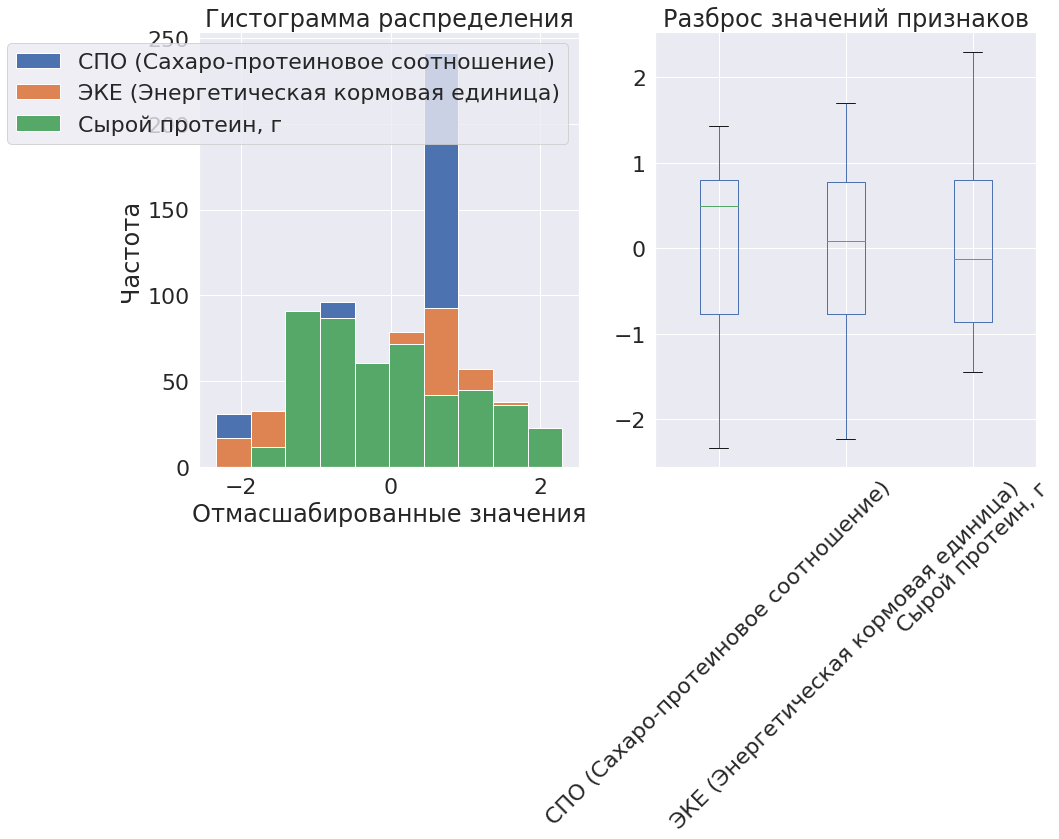

,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г"
0,1.0,0.0,0.0,0.0,0.805364,0.931742,0.391631
1,1.0,0.0,0.0,0.0,0.491777,1.008962,0.647203
2,0.0,1.0,0.0,0.0,0.491777,-0.303775,-0.690472
3,0.0,0.0,1.0,0.0,0.491777,-0.767094,-0.603469
4,1.0,0.0,0.0,0.0,0.805364,0.545643,1.511797


,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г"
0,1.0,0.0,0.0,0.0,1.118951,1.472281,1.544423
1,0.0,1.0,1.0,0.0,0.805364,1.626721,0.136059
2,0.0,0.0,0.0,0.0,-1.076159,-0.303775,-0.674159
3,0.0,0.0,0.0,0.0,-0.762572,-0.149336,-0.587156
4,0.0,0.0,1.0,0.0,-1.076159,-0.998754,-1.065674



Коэффициенты линейной регрессии: [   1.16765934   53.09196401 -240.90235752 -223.62149708  166.90926237
  151.70256504   49.38153146]
Коэффициент w0: 6271.63233693724

Метрики качества модели:
R2: 0.811
MSE: 42899.729
RMSE: 207.122
MAE: 162.668


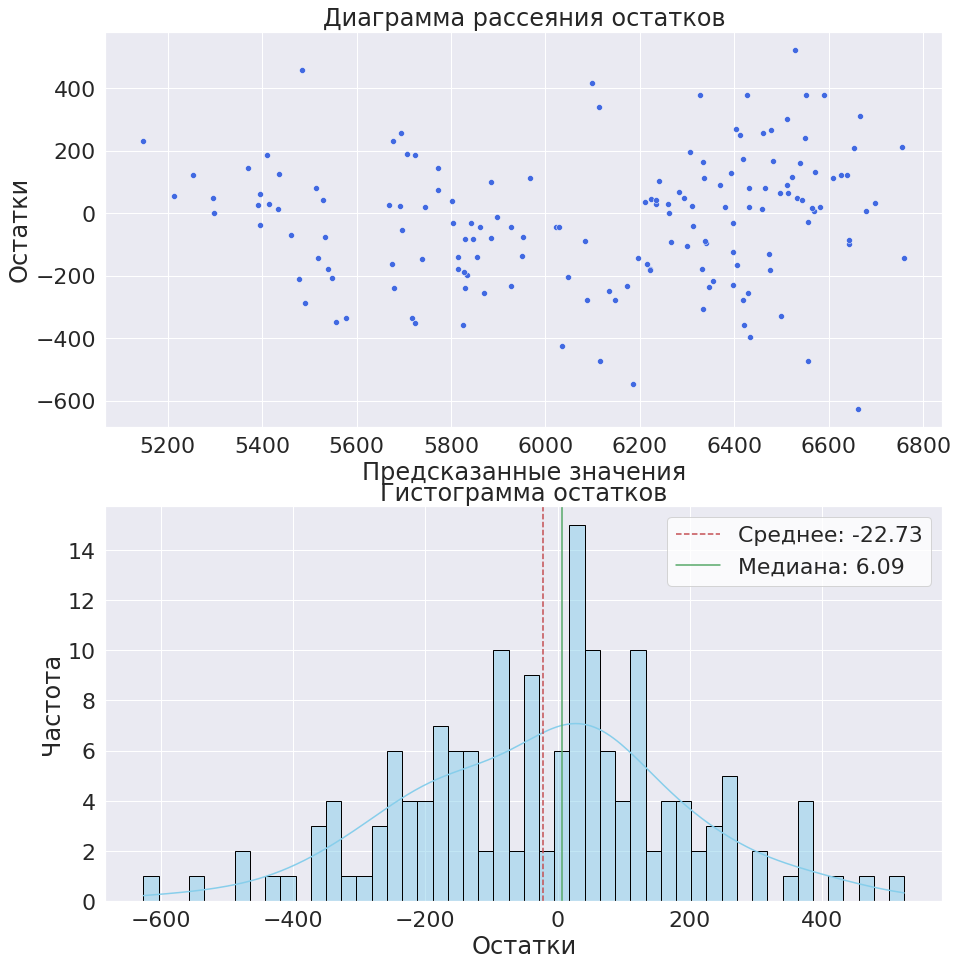

In [91]:
lr_model_1, encoder_1, scaler_1, y_test_1, y_pred_1, r2_1, mse_1, rmse_1, mae_1 = my_linear_model(
        df, 'Удой, кг', [
            'СПО (Сахаро-протеиновое соотношение)', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г'], [
            'Порода', 'Тип пастбища', 'Порода папы-быка', 'Возраст'], metrics=True)

Видим, что гистограмма имеет вид, отличающийся от нормального распределение с вершиной в нуле, однако, диаграмма рассеяния имеет форму похожую на дугу, что говорит о том, что характер влияния некоторых признаков на удой - нелинейный.

**Вывод:** 
- Полученное значение коэффициента детерминации R2 - 0,811, что говорит о том, что 81,1% дисперсии целевого признака объясняется моделью;
- По анализу остатков можно сделать вывод, что некоторые из признаков имеют нелинейный характер связи с целевой переменной, т.к диаграмма рассеяния имеет вид дуги, а гистограмма распределения остатков имеет отличающийся от нормального вид;
- Для доработки модели глубже исследуем признаки с целью поиска нелинейных связей между переменными.

### Вторая модель линейной регрессии

Для построения второй модели линейной регрессии учтем выводы по первой модели и устраним нелинейных характер некоторых признаков, а именно:
- `СПО` и `Удой, кг` связаны нелинейно. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав границу между двумя кластерами.
- `ЭКЕ` и `Удой, кг` связаны нелинейно. Нелинейность между ними исключим, введя новый признак `ЭКЕ в квадрате`.

Рассмотрим подробнее диаграмму рассеяния для признаков `СПО (Сахаро-протеиновое соотношение)` и `Удой, кг`.

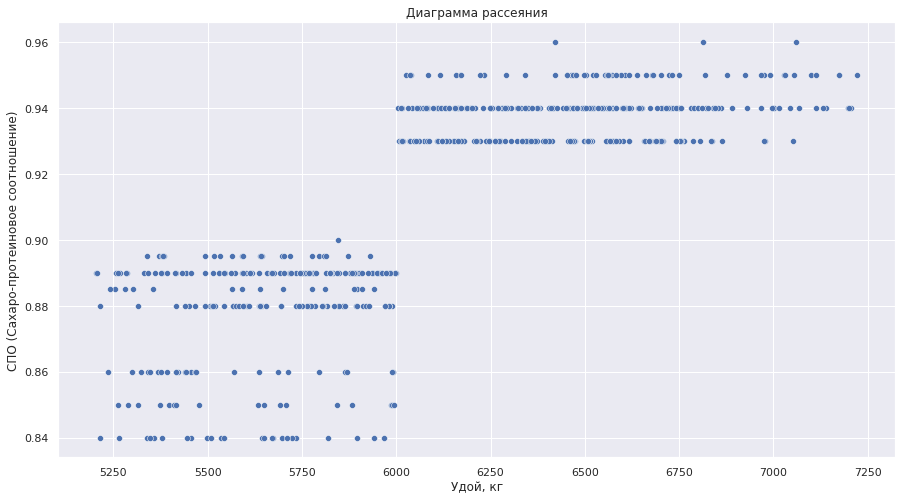

In [61]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Удой, кг', y='СПО (Сахаро-протеиновое соотношение)')
plt.title('Диаграмма рассеяния');

Видим, что значение СПО, разделяющее два кластера - 0,91. Соотвественно, создадим новый столбец `СПО бинарный`, в котором закодируем значения ниже границы 0, выше - 1.

In [62]:
df['СПО бинарный'] = df['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x > 0.91 else 0).astype('category')

/tmp/ipykernel_48/3718852866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['СПО бинарный'] = df['СПО (Сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x > 0.91 else 0).astype('category')


Также создадим новый столбец `ЭКЕ в квадрате`, в котором будут значения из столбца `ЭКЕ (Энергетическая кормовая единица)`, возведенные в квадрат.

In [63]:
df['ЭКЕ в квадрате'] = df['ЭКЕ (Энергетическая кормовая единица)'] ** 2
df.head()

/tmp/ipykernel_48/4197512799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ЭКЕ в квадрате'] = df['ЭКЕ (Энергетическая кормовая единица)'] ** 2


,id,"Удой, кг",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",Порода,Тип пастбища,Порода папы-быка,Возраст,СПО бинарный,ЭКЕ в квадрате
0,1,5863,0.890,14.2,1743,Вис Бик Айдиал,Равнинное,Айдиал,Более_2_лет,0,201.64
1,2,5529,0.890,12.8,2138,Вис Бик Айдиал,Равнинное,Соверин,Менее_2_лет,0,163.84
2,3,5810,0.885,14.0,1854,Рефлешн Соверинг,Холмистое,Соверин,Более_2_лет,0,196.00
3,4,5895,0.885,12.4,2012,Рефлешн Соверинг,Холмистое,Айдиал,Более_2_лет,0,153.76
4,5,5302,0.885,12.8,1675,Вис Бик Айдиал,Равнинное,Соверин,Менее_2_лет,0,163.84


Обучим вторую модель, заменив `СПО (Сахаро-протеиновое соотношение)` на `СПО бинарный`, а `ЭКЕ (Энергетическая кормовая единица)` на `ЭКЕ в квадрате`.

,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,x4_1
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


,ЭКЕ в квадрате,"Сырой протеин, г"
0,1.544860,1.544423
1,1.722930,0.136059
2,-0.348740,-0.674159
3,-0.195342,-0.587156
4,-1.012479,-1.065674


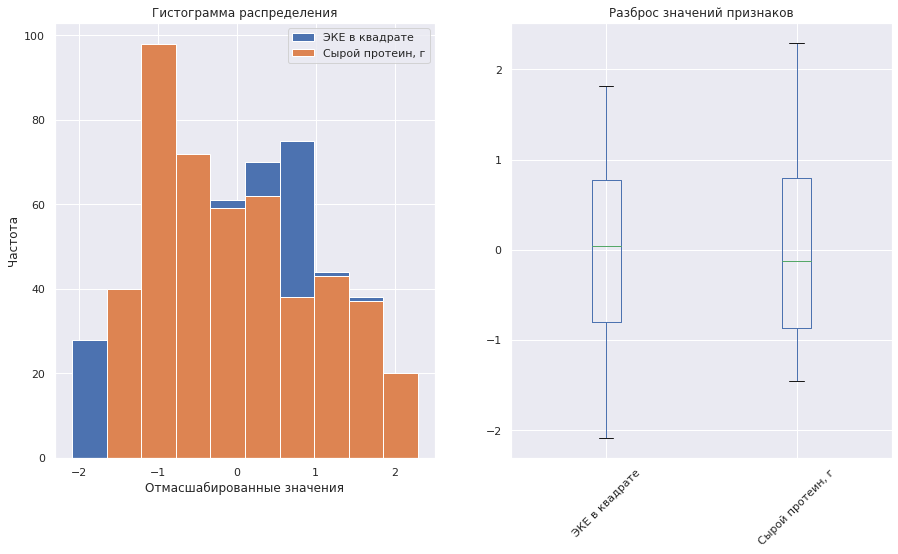

,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,x4_1,ЭКЕ в квадрате,"Сырой протеин, г"
0,1.0,0.0,0.0,0.0,1.0,0.938511,0.391631
1,1.0,0.0,0.0,0.0,1.0,1.023524,0.647203
2,0.0,1.0,0.0,0.0,1.0,-0.348740,-0.690472
3,0.0,0.0,1.0,0.0,1.0,-0.796060,-0.603469
4,1.0,0.0,0.0,0.0,1.0,0.521496,1.511797


,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,x4_1,ЭКЕ в квадрате,"Сырой протеин, г"
0,1.0,0.0,0.0,0.0,1.0,1.544860,1.544423
1,0.0,1.0,1.0,0.0,1.0,1.722930,0.136059
2,0.0,0.0,0.0,0.0,0.0,-0.348740,-0.674159
3,0.0,0.0,0.0,0.0,0.0,-0.195342,-0.587156
4,0.0,0.0,1.0,0.0,0.0,-1.012479,-1.065674



Коэффициенты линейной регрессии: [   3.23202527   32.51059643 -215.93077509 -210.43148878  378.71989666
  152.51172904   50.0611993 ]
Коэффициент w0: 6037.5694725439425

Метрики качества модели:
R2: 0.842
MSE: 35742.865
RMSE: 189.058
MAE: 144.589


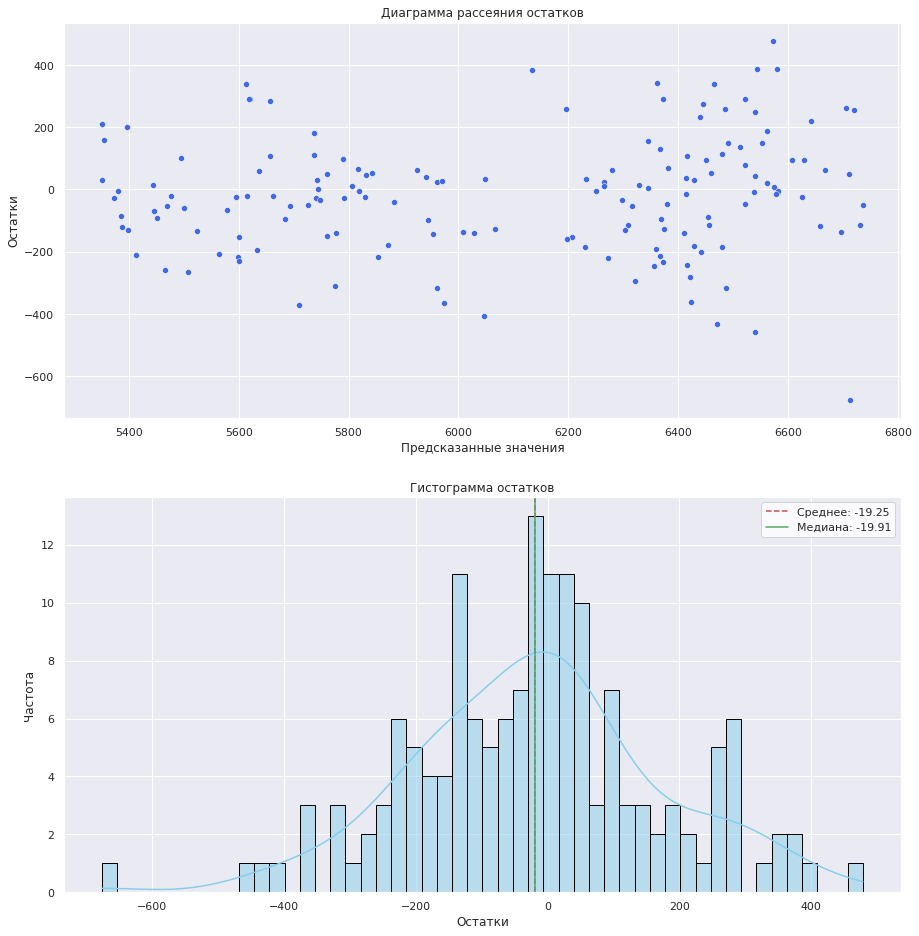

In [64]:
lr_model_2, encoder_2, scaler_2, y_test_2, y_pred_2, r2_2, mse_2, rmse_2, mae_2 = my_linear_model(
    df, 'Удой, кг', ['ЭКЕ в квадрате', 'Сырой протеин, г'], [
        'Порода', 'Тип пастбища', 'Порода папы-быка', 'Возраст', 'СПО бинарный'], metrics=True)

**Вывод:**
- Полученное значение коэффициента детерминации R2 - 0,842, что говорит о том, что 84,2% дисперсии целевого признака объясняется моделью;
- По анализу остатков можно сделать вывод, что некоторые из признаков также имеют нелинейный характер связи с целевой переменной, т.к на диаграмме рассеяния все также просматривается дуга, хоть и уже менее отчетливо;
- Для доработки модели глубже исследуем признаки с целью поиска нелинейных связей между переменными.

### Третья модель линейной регрессии

Рассмотрим подробнее диаграмму рассеяния признаков `Удой, кг` и `Жирность,%` на участке от 3,6 до 3,8%.

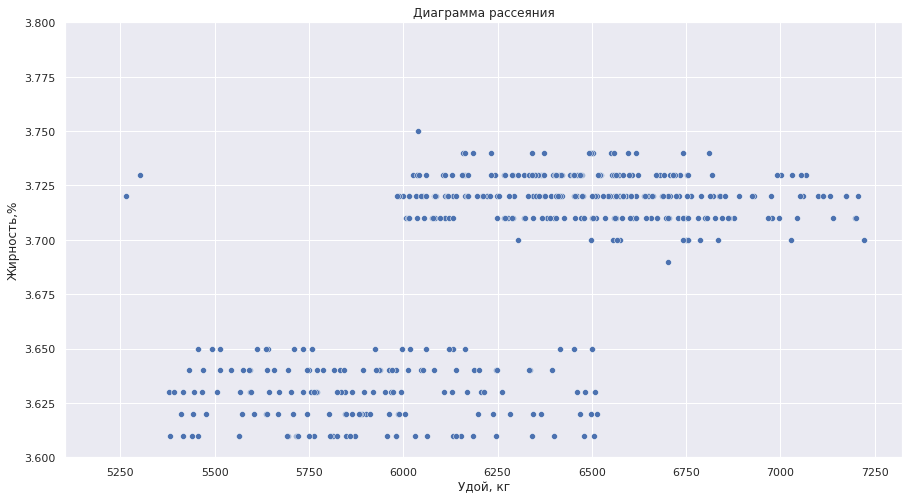

In [65]:
df['Жирность,%'] = df_ferma['Жирность,%']
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Удой, кг', y='Жирность,%')
plt.ylim(3.6, 3.8)
plt.title('Диаграмма рассеяния');

Видим, что существует граница, делящая данные на два кластера. За такую границу примем значение жирности - 3,675% и введем новый признак `Жирность бинарная`, принимающий значение 1, если жирность больше границы и 0 в противном случае.

Также введем в данные новый признак `Имя Папы` из датасета *df_dad* по ключу `id`.

In [66]:
df = df.merge(df_dad, on='id')
df['Жирность бинарная'] = df['Жирность,%'].apply(lambda x: 1 if x > 3.675 else 0).astype('category')
df.head()

,id,"Удой, кг",СПО (Сахаро-протеиновое соотношение),ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",Порода,Тип пастбища,Порода папы-быка,Возраст,СПО бинарный,ЭКЕ в квадрате,"Жирность,%",Имя папы,Жирность бинарная
0,1,5863,0.890,14.2,1743,Вис Бик Айдиал,Равнинное,Айдиал,Более_2_лет,0,201.64,3.58,Буйный,0
1,2,5529,0.890,12.8,2138,Вис Бик Айдиал,Равнинное,Соверин,Менее_2_лет,0,163.84,3.54,Соловчик,0
2,3,5810,0.885,14.0,1854,Рефлешн Соверинг,Холмистое,Соверин,Более_2_лет,0,196.00,3.59,Барин,0
3,4,5895,0.885,12.4,2012,Рефлешн Соверинг,Холмистое,Айдиал,Более_2_лет,0,153.76,3.40,Буйный,0
4,5,5302,0.885,12.8,1675,Вис Бик Айдиал,Равнинное,Соверин,Менее_2_лет,0,163.84,3.73,Барин,1


Для новой модели линейной регрессии используем добавленные признаки `Имя Папы` и `Жирность бинарная`.

,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,x4_1,x5_Буйный,x5_Геркулес,x5_Соловчик,x6_1
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


,ЭКЕ в квадрате,"Сырой протеин, г"
0,1.544860,1.544423
1,1.722930,0.136059
2,-0.348740,-0.674159
3,-0.195342,-0.587156
4,-1.012479,-1.065674


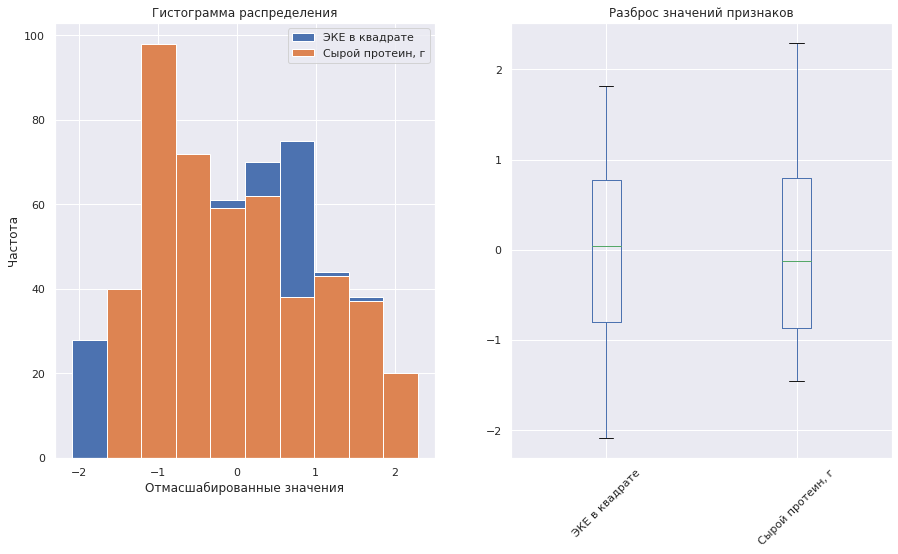

,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,x4_1,x5_Буйный,x5_Геркулес,x5_Соловчик,x6_1,ЭКЕ в квадрате,"Сырой протеин, г"
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.938511,0.391631
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.023524,0.647203
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.348740,-0.690472
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.796060,-0.603469
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.521496,1.511797


,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,x4_1,x5_Буйный,x5_Геркулес,x5_Соловчик,x6_1,ЭКЕ в квадрате,"Сырой протеин, г"
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.544860,1.544423
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.722930,0.136059
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.348740,-0.674159
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.195342,-0.587156
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.012479,-1.065674



Коэффициенты линейной регрессии: [  -0.91107364   75.05131774   37.25452825 -186.92089769  227.53278277
  329.19670181  345.44531917   14.61272488  229.76638159  118.81343473
   48.90880675]
Коэффициент w0: 5713.279575506309

Метрики качества модели:
R2: 0.846
MSE: 35024.242
RMSE: 187.148
MAE: 147.931


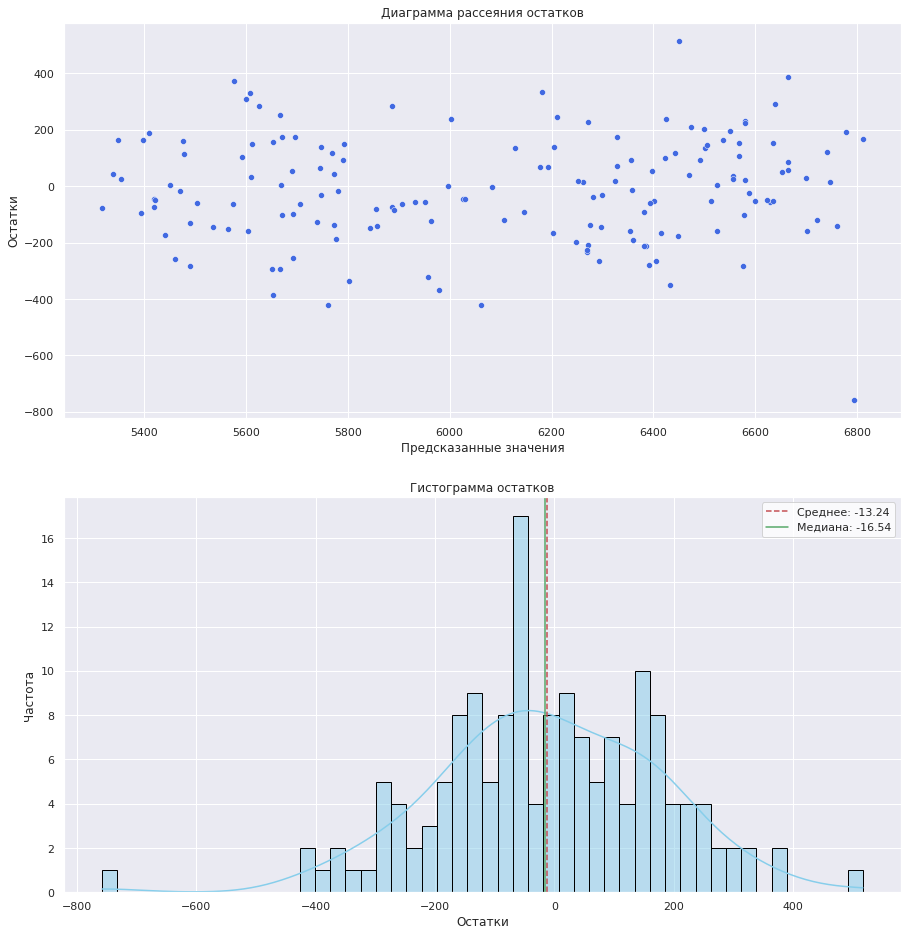

In [67]:
lr_model_3, encoder_3, scaler_3, y_test_3, y_pred_3, r2_3, mse_3, rmse_3, mae_3 = my_linear_model(
    df, 'Удой, кг', ['ЭКЕ в квадрате', 'Сырой протеин, г'], [
    'Порода', 'Тип пастбища', 'Порода папы-быка', 'Возраст', 'СПО бинарный', 'Имя папы', 'Жирность бинарная'
    ], metrics=True)

**Вывод:**
- Полученное значение коэффициента детерминации R2 - 0,846, что говорит о том, что 84,6% дисперсии целевого признака объясняется моделью;
- По анализу остатков можно сделать вывод, что по диаграмме рассеяния дисперсия остатков - постоянна, гистограмма распределения остатков имеет вид близкий к нормальному распределению;
- Модель все еще неидальна, и может быть доработана путем более детального изучения взаимовлияния признаков.

### Оценка качества моделей

Сравним качество трёх моделей линейной регрессии, сопоставьте их R2, MSE, RMSE, MAE.

In [68]:
df_metrics = pd.DataFrame([(r2_1, mse_1, rmse_1, mae_1), (r2_2, mse_2, rmse_2, mae_2), (r2_3, mse_3, rmse_3, mae_3)], 
                          columns = ['R2', 'MSE', 'RMSE', 'MAE'], index=['Модель 1', 'Модель 2', 'Модель 3']).round(3)
df_metrics

,R2,MSE,RMSE,MAE
Модель 1,0.811,42899.729,207.122,162.668
Модель 2,0.842,35742.865,189.058,144.589
Модель 3,0.846,35024.242,187.148,147.931


Видим, что коэффицент детеминации R2 лучший у третьей модели (0,846), также MSE и RMSE лучший у третьей модели.

В качестве лучшей модели выберем третью модель, т.к хоть MAE второй модели меньше, по совокупности других метрик третья модель показывает себя лучше всего на наших данных.

Укажем доверительный интервал прогноза лучшей модели.

In [69]:
a = y_pred_3.flatten()
print(f'Нижняя граница доверительного интервала: {np.quantile(a, 0.025):.2f}')
print(f'Верхняя граница доверительного интервала: {np.quantile(a, 0.975):.2f}')

Нижняя граница доверительного интервала: 5391.02
Верхняя граница доверительного интервала: 6748.61


**Вывод:**
- За лучшую модель выбрана третья модель с коэффициентом детерминации R2 равным 0,864, среднеквадратичной ошибкой MSE - 35024.242, корень среднеквадратичной ошибка RMSE - 187.148 и средней абсолютной ошибкой 147.931.
- Доверительный интервал выбранной модели - 5391,02 - 6748,61 кг в год.

### Прогноз целевого признака

In [70]:
df_cow_buy.head()

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Текущая жирность,%","Текущий уровень белка,%",Возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее_2_лет
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Более_2_лет
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Более_2_лет


Добавим в датасет *df_cow_buy* необходимые столбцы для прогноза.

Столбцы `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` в датасете *df_cow_buy* заполним средним значением из датасета *df*, увеличенным на 5%.

In [71]:
for i in ['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Сырой протеин, г']:
    df_cow_buy[i] = (df[i].mean() * 1.05).round(3)
df_cow_buy.head()    

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Текущая жирность,%","Текущий уровень белка,%",Возраст,ЭКЕ (Энергетическая кормовая единица),СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г"
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет,15.288,0.959,2019.893
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее_2_лет,15.288,0.959,2019.893
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет,15.288,0.959,2019.893
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Более_2_лет,15.288,0.959,2019.893
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Более_2_лет,15.288,0.959,2019.893


Добавим столбцы `ЭКЕ в квадрате`, `СПО бинарный` и `Жирность бинарная` по аналогии с датасетом *df*.

In [72]:
df_cow_buy['ЭКЕ в квадрате'] = df_cow_buy['ЭКЕ (Энергетическая кормовая единица)'] ** 2
df_cow_buy['СПО бинарный'] = df_cow_buy['СПО (Сахаро-протеиновое соотношение)'].apply(
    lambda x: 1 if x > 0.91 else 0).astype('category')
df_cow_buy['Жирность бинарная'] = df_cow_buy['Текущая жирность,%'].apply(lambda x: 1 if x > 3.675 else 0).astype('category')
df_cow_buy.head()

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Текущая жирность,%","Текущий уровень белка,%",Возраст,ЭКЕ (Энергетическая кормовая единица),СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ в квадрате,СПО бинарный,Жирность бинарная
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее_2_лет,15.288,0.959,2019.893,233.722944,1,0
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0


Используем модель 3 для получения прогноза, предварительно закодировав категориальные признаки и отмасштабировав количественные.

In [73]:
num_cols = ['ЭКЕ в квадрате', 'Сырой протеин, г'] 
cat_cols = ['Порода', 'Тип пастбища', 'Порода папы-быка', 'Возраст', 'СПО бинарный', 'Имя папы', 'Жирность бинарная']

X = df_cow_buy
X_ohe = encoder_3.transform(X[cat_cols])
encoder_col_names = encoder_3.get_feature_names()
df_X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = scaler_3.transform(X[num_cols])
df_X_scaled = pd.DataFrame(X_scaled, columns=num_cols)

X = pd.concat([df_X_ohe, df_X_scaled], axis=1)

y = lr_model_3.predict(X)
df_pred = pd.DataFrame(y, columns=['Предсказанный удой, кг'])
df_pred

,"Предсказанный удой, кг"
0,6446.810845
1,6205.844541
2,6062.657663
3,6429.651154
4,6354.599836
5,6221.182084
6,6446.810845
7,6392.765438
8,6062.657663
9,6242.730256


In [74]:
df_cow_buy['Предсказанный удой, кг'] = df_pred.round(3)
df_cow_buy.head()

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Текущая жирность,%","Текущий уровень белка,%",Возраст,ЭКЕ (Энергетическая кормовая единица),СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ в квадрате,СПО бинарный,Жирность бинарная,"Предсказанный удой, кг"
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6446.811
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее_2_лет,15.288,0.959,2019.893,233.722944,1,0,6205.845
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6062.658
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6429.651
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6354.600


In [75]:
df_cow_buy['Предсказанный удой, кг'].sort_values()

13    5951.699
2     6062.658
14    6062.658
8     6062.658
1     6205.845
5     6221.182
9     6242.730
19    6354.600
4     6354.600
10    6382.999
16    6382.999
18    6392.765
7     6392.765
3     6429.651
15    6429.651
6     6446.811
0     6446.811
17    6450.948
11    6637.869
12    6676.577
Name: Предсказанный удой, кг, dtype: float64

**Вывод:**
- Разработанная модель машинного обучения прогнозирует удой коров на основе таких признаков, как `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`, `Текущая жирность,%` а также `Порода`, `Тип пастбища`, `Порода папы-быка` и `Возраст`.

- Из предсказаний модели видно, что большинство коров, которые фермер планирует приобрести, способны произвести более 6000 кг молока в год. Самое низкое предсказанное значение удоя составляет около 5951.699 кг, и оно является единственным значением меньше 6000 кг. Это говорит о том, что фермер может использовать данную модель для помощи в управлениями рисками и принятии объективного решения о покупке коров.

### Вывод по разделу

1. **Обучение моделей линейной регрессии**:

    - По результатам работы первой модели:
    
        - Полученное значение коэффициента детерминации R2 - 0,811, что говорит о том, что 81,1% дисперсии целевого признака объясняется моделью;
        - По анализу остатков можно сделать вывод, что некоторые из признаков имеют нелинейный характер связи с целевой переменной, т.к диаграмма рассеяния имеет вид дуги, а гистограмма распределения остатков имеет отличающийся от нормального вид;
        - Для доработки модели глубже исследуем признаки с целью поиска нелинейных связей между переменными.
        
    - По результатам работы второй модели:
    
        - Полученное значение коэффициента детерминации R2 - 0,842, что говорит о том, что 84,2% дисперсии целевого признака объясняется моделью;
        - По анализу остатков можно сделать вывод, что некоторые из признаков также имеют нелинейный характер связи с целевой переменной, т.к на диаграмме рассеяния все также просматривается дуга, хоть и уже менее отчетливо;
        - Для доработки модели глубже исследуем признаки с целью поиска нелинейных связей между переменными.
        
    - По результатам работы третьей модели:
    
        - Полученное значение коэффициента детерминации R2 - 0,846, что говорит о том, что 84,6% дисперсии целевого признака объясняется моделью;
        - По анализу остатков можно сделать вывод, что по диаграмме рассеяния дисперсия остатков - постоянна, гистограмма распределения остатков имеет вид близкий к нормальному распределению;
        - Модель все еще неидальна, и может быть доработана путем более детального изучения взаимовлияния признаков.
        
2. **Оценка качества модели:**
    - За лучшую модель выбрана третья модель с коэффициентом детерминации R2 равным 0,864, среднеквадратичной ошибкой MSE - 35024.242, корень среднеквадратичной ошибка RMSE - 187.148 и средней абсолютной ошибкой 147.931.
    - Доверительный интервал выбранной модели - 5391,02 - 6748,61 кг в год.

3. **Прогноз целевого признака:**
    - Разработанная модель машинного обучения прогнозирует удой коров на основе таких признаков, как `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`, `Текущая жирность,%` а также `Порода`, `Тип пастбища`, `Порода папы-быка` и `Возраст`.
    - Из предсказаний модели видно, что большинство коров, которые фермер планирует приобрести, способны произвести более 6000 кг молока в год. Самое низкое предсказанное значение удоя составляет около 5951.699 кг, и оно является единственным значением меньше 6000 кг. Это говорит о том, что фермер может использовать данную модель для помощи в управлениями рисками и принятии объективного решения о покупке коров.

## Обучение модели логистической регрессии

Копируем датасет *df_ferma* в переменную lr_df и добавим столбец `Вкус молока бинарный`, куда закодируем значения столбца `Вкус молока` в категориальные значения.

In [76]:
lr_df = df_ferma

lr_df['Вкус молока бинарный'] = lr_df['Вкус молока'].replace({'Вкусно': 1, 'Не вкусно': 0}).astype('category')
lr_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы-быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Вкус молока бинарный
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,Вкусно,Более_2_лет,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,Вкусно,Менее_2_лет,1
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,Не вкусно,Более_2_лет,0
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,Не вкусно,Более_2_лет,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,Вкусно,Менее_2_лет,1


Обучим модель логистической регресии.

In [77]:
list_of_cat_cols = ['Порода', 'Тип пастбища', 'Порода папы-быка', 'Возраст']
list_of_num_cols = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
                    'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%'] 

X = lr_df.drop(['Вкус молока', 'Вкус молока бинарный'], axis=1)
y = lr_df['Вкус молока бинарный']
    
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
X, 
y, 
random_state=RANDOM_STATE
)
    
# Закодируем категориальные признаки с помощью OneHotEncoder. Исключим dummy-ловушки,удалив первые столбцы в каждом признаке
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[list_of_cat_cols])
X_test_ohe = encoder.transform(X_test[list_of_cat_cols])
encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
df_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    
    
# Масштабируем количественные признаки с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[list_of_num_cols])
X_test_scaled = scaler.transform(X_test[list_of_num_cols])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=list_of_num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list_of_num_cols)
df_scaled = pd.DataFrame(X_train_scaled, columns=list_of_num_cols)
    
    
# Объединим полученные датафреймы в тренировочную и тестовую выборки
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
display(X_train.head())
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
display(X_test.head())    
    
# Инициализируем логистическую регрессию и получим предсказанные значения
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
0,1.0,0.0,0.0,0.0,1.472281,1.544423,1.118951,0.610045,-0.275968
1,0.0,1.0,1.0,0.0,1.626721,0.136059,0.805364,0.610045,-1.467032
2,0.0,0.0,0.0,0.0,-0.303775,-0.674159,-1.076159,-0.725504,2.106160
3,0.0,0.0,0.0,0.0,-0.149336,-0.587156,-0.762572,0.245804,0.518075
4,0.0,0.0,1.0,0.0,-0.998754,-1.065674,-1.076159,0.063684,-0.672989


,x0_Рефлешн Соверинг,x1_Холмистое,x2_Соверин,x3_Менее_2_лет,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
0,1.0,0.0,0.0,0.0,0.931742,0.391631,0.805364,0.670752,-0.275968
1,1.0,0.0,0.0,0.0,1.008962,0.647203,0.491777,0.610045,-1.467032
2,0.0,1.0,0.0,0.0,-0.303775,-0.690472,0.491777,0.610045,-1.467032
3,0.0,0.0,1.0,0.0,-0.767094,-0.603469,0.491777,0.670752,-0.672989
4,1.0,0.0,0.0,0.0,0.545643,1.511797,0.805364,0.670752,-1.864053


Оценим качество модели на тестовой выборке: рассчитаем метрики Accuracy, Precision, Recall, а также построим матрицу ошибок полученной модели.

Accuracy: 0.599
Precision: 0.610
Recall: 0.809


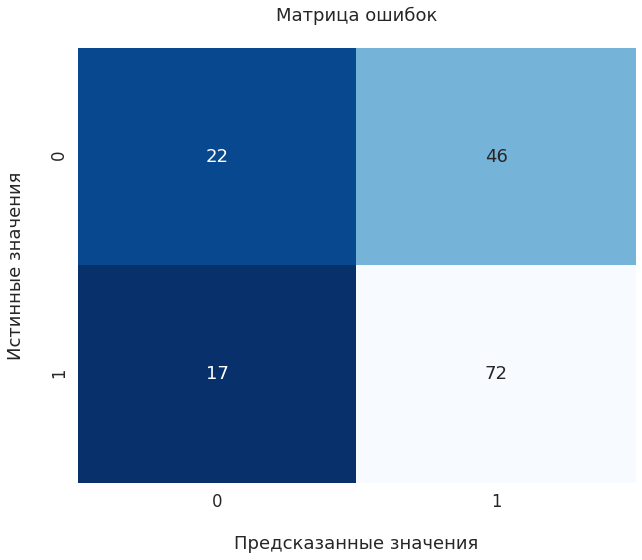

In [78]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print(f'Precision: {precision_score(y_test, y_pred):.3f}')
print(f'Recall: {recall_score(y_test, y_pred):.3f}')

sns.set(font_scale=1.5)
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, color='b', annot=True, cmap='Blues_r', cbar=False)
plt.title('Матрица ошибок\n')
plt.xlabel('\nПредсказанные значения')
plt.ylabel('Истинные значения\n');

**Вывод:**
- Для построения модели логистической регресии были использованы такие категориальные данные как `Порода`, `Тип пастбища`, `Порода папы-быка`, `Возраст` и количественные - `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`, `Жирность,%`, `Белок,%`.
- Полученная модель имеет следующие метрики качества:
    - Accuracy: 0.599;
    - Precision: 0.610;
    - Recall: 0.809.

### Анализ модели логистической регрессии

При покупке коров намного более худший вариант - это купить корову, которая будет давать невкусное молоко, чем не купить корову, дающую вкусное молоко. Соотвественно, нам необходимо минимизировать ложноположительные прогнозы (ошибки 1 рода). Для этого построим матрицы ошибок для различных значений порога логистической регресии.

In [79]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
data.head()

,y_valid,y_proba
19,0,0.852325
85,1,0.829750
98,1,0.827850
66,1,0.812613
146,1,0.811140


In [80]:
thresholds = [round(i,3) for i in np.linspace(0.1, 1, num = 1000, endpoint=False)]

columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>i else 0)
data.head(5)

,y_valid,y_proba,y_pred_0.1,y_pred_0.101,y_pred_0.102,y_pred_0.103,y_pred_0.104,y_pred_0.105,y_pred_0.106,y_pred_0.107,...,y_pred_0.99,y_pred_0.991,y_pred_0.992,y_pred_0.993,y_pred_0.994,y_pred_0.995,y_pred_0.996,y_pred_0.997,y_pred_0.998,y_pred_0.999
19,0,0.852325,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
85,1,0.829750,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
98,1,0.827850,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
66,1,0.812613,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
146,1,0.811140,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
for i in thresholds:
    cm = confusion_matrix(y_test, data['y_pred_'+str(i)])
    if cm[0][1] == 0:
        print('Порог =', i)
        print('Precision =', round(precision_score(y_test, data['y_pred_'+str(i)]), 2))
        print('TP =', cm[1][1])
        break

Порог = 0.83
Precision = 1.0
TP = 1


Необходимое значение порога для того, чтобы свести ошибки первого рода к нулю - 0,83. При этом остается всего одно значение True Positive. Выведем полученную матрицу ошибок для найденного значения порога и метрики для него.

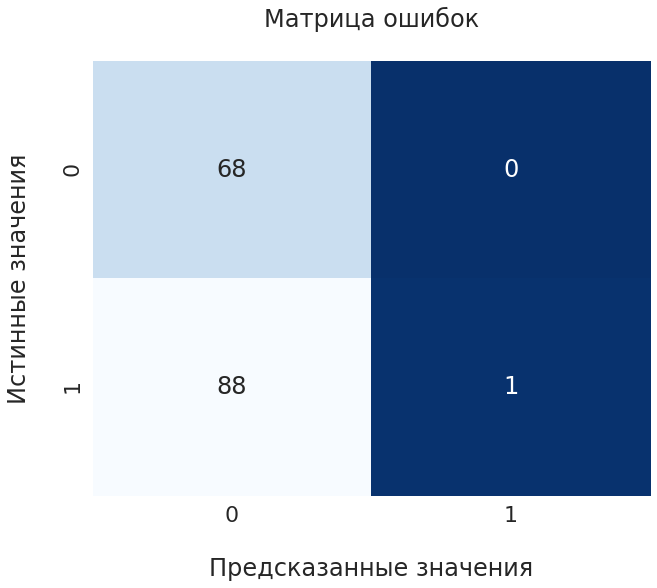

Accuracy = 0.439
Precision = 1.0
Recall =  0.011


In [82]:
threshold = i
acc = round(accuracy_score(y_test, data['y_pred_'+str(i)]), 3)
precision = round(precision_score(y_test, data['y_pred_'+str(i)]), 3)
recall = round(recall_score(y_test, data['y_pred_'+str(i)]), 3)

plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, data['y_pred_'+str(i)])

sns.set (font_scale= 2 )
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', cbar=False);
plt.title('Матрица ошибок\n')
plt.xlabel('\nПредсказанные значения')
plt.ylabel('Истинные значения\n')
plt.show()

print('Accuracy =', acc)
print('Precision =', precision)
print('Recall = ', recall)         

**Вывод:**
- Для минимзирования ошибок 1-го рода значение порога было выбрано равным 0,83, при котором матрица ошибок имеет ноль значений FP и одну TP.
- Полученная модель имеет следующие метрики качества:
    - Accuracy: 0.439;
    - Precision: 1.0;
    - Recall: 0.011.
- Несмотря на значение Precision равное 1, что и нужно было в данной задаче, accuracy модели всего 0,439, что говорит о том, что модель предсказывает верные значения только в 43,9% случаев. Для доработки моедли в будущем необходимо найти более сбалансированный порог классификации, который будет учитывать как Precision, так и Recall. Это может быть сделано с помощью кривой Precision-Recall и выбора точки, которая соответствует желаемому балансу.

### Прогноз вкуса молока

Получим прогноз для коров из датасета *df_cow_buy*.

In [83]:
df_cow_buy.rename(columns={'Текущая жирность,%': 'Жирность,%', 'Текущий уровень белка,%': 'Белок,%'}, inplace=True)

list_of_cat_cols = ['Порода', 'Тип пастбища', 'Порода папы-быка', 'Возраст']
list_of_num_cols = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
                    'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%'] 

X = df_cow_buy

X_ohe = encoder.transform(X[list_of_cat_cols])
encoder_col_names = encoder.get_feature_names()
df_X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = scaler.transform(X[list_of_num_cols])
df_X_scaled = pd.DataFrame(X_scaled, columns=list_of_num_cols)

X = pd.concat([df_X_ohe, df_X_scaled], axis=1)

y_pred = clf.predict_proba(X)
df_cow_buy['y_pred'] = y_pred[:, 1]
df_cow_buy['Вкус молока'] = df_cow_buy['y_pred'].apply(lambda x: 'Вкусное' if x > threshold else 'Не вкусное')

df_cow_buy.drop('y_pred', axis=1, inplace=True)
df_cow_buy

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Жирность,%","Белок,%",Возраст,ЭКЕ (Энергетическая кормовая единица),СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ в квадрате,СПО бинарный,Жирность бинарная,"Предсказанный удой, кг",Вкус молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6446.811,Не вкусное
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,Менее_2_лет,15.288,0.959,2019.893,233.722944,1,0,6205.845,Не вкусное
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6062.658,Не вкусное
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6429.651,Не вкусное
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6354.600,Не вкусное
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,Менее_2_лет,15.288,0.959,2019.893,233.722944,1,0,6221.182,Не вкусное
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6446.811,Не вкусное
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6392.765,Не вкусное
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,Более_2_лет,15.288,0.959,2019.893,233.722944,1,0,6062.658,Не вкусное
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,Менее_2_лет,15.288,0.959,2019.893,233.722944,1,0,6242.730,Вкусное


Видим, что при значении порога - 0,83 наша модель предсказывает молоко вкусным только у одной коровы.

In [84]:
df_cow_buy[df_cow_buy['Вкус молока'] == 'Вкусное']

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Жирность,%","Белок,%",Возраст,ЭКЕ (Энергетическая кормовая единица),СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ в квадрате,СПО бинарный,Жирность бинарная,"Предсказанный удой, кг",Вкус молока
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.4,3.079,Менее_2_лет,15.288,0.959,2019.893,233.722944,1,0,6242.73,Вкусное


**Вывод:**
- Мы использовали обученную ранее модель классификации и подобранный порог (0.83) для предсказания вкуса молока у коров, которые фермер планирует приобрести, и добавили эти предсказания в датафрейм df_cow_buy в столбец `Вкус молока`.

- По полученным результатам мы можем увидеть, что из 20 коров, которых фермер собирается купить, у 19 коров предсказан вкус молока с меткой не вкусное молоко, и у 1 коров — с меткой вкусное молоко.

### Вывод по разделу

1. **Обучение модели логистической регрессии:**
    - Для построения модели логистической регресии были использованы такие категориальные данные как `Порода`, `Тип пастбища`, `Порода папы-быка`, `Возраст` и количественные - `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`, `Жирность,%`, `Белок,%`.
    - Полученная модель имеет следующие метрики качества:
        - Accuracy: 0.599;
        - Precision: 0.610;
        - Recall: 0.809.
    
2. **Анализ модели логистической регрессии:**
    - Для минимзирования ошибок 1-го рода значение порога было выбрано равным 0,83, при котором матрица ошибок имеет ноль значений FP и одну TP.
    - Полученная модель имеет следующие метрики качества:
        - Accuracy: 0.439;
        - Precision: 1.0;
        - Recall: 0.011.
    - Несмотря на значение Precision равное 1, что и нужно было в данной задаче, accuracy модели всего 0,439, что говорит о том, что модель предсказывает верные значения только в 43,9% случаев. Для доработки моедли в будущем необходимо найти более сбалансированный порог классификации, который будет учитывать как Precision, так и Recall. Это может быть сделано с помощью кривой Precision-Recall и выбора точки, которая соответствует желаемому балансу.
    
3. **Прогноз вкуса молока:**
    - Мы использовали обученную ранее модель классификации и подобранный порог (0.83) для предсказания вкуса молока у коров, которые фермер планирует приобрести, и добавили эти предсказания в датафрейм df_cow_buy в столбец `Вкус молока`.
    - По полученным результатам мы можем увидеть, что из 20 коров, которых фермер собирается купить, у 19 коров предсказан вкус молока с меткой не вкусное молоко, и у 1 коров — с меткой вкусное молоко.

## Итоговые выводы

#### Выводы по отобранным коровам

Отберём коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [85]:
df_cow_buy[(df_cow_buy['Предсказанный удой, кг'] > 6000) & (df_cow_buy['Вкус молока'] == 'Вкусное')]

,Порода,Тип пастбища,Порода папы-быка,Имя папы,"Жирность,%","Белок,%",Возраст,ЭКЕ (Энергетическая кормовая единица),СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ в квадрате,СПО бинарный,Жирность бинарная,"Предсказанный удой, кг",Вкус молока
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.4,3.079,Менее_2_лет,15.288,0.959,2019.893,233.722944,1,0,6242.73,Вкусное


Результаты работы моделей показывают, что из представленного стада на продажу фермер может выбрать одну корову, которая соответствуют двум ключевым критериям: удой более 6000 кг в год и вкусное молоко.

#### Выводы о моделях линейной регрессии и логистической регрессии:

Линейная регрессия:

- Модели линейной регрессии показали высокую объяснимость удоя молока, но выявили нелинейности в данных, что требует дополнительной настройки.
- Использовались различные методы для улучшения моделей, включая добавление новых признаков и преобразование существующих для учета нелинейных зависимостей.
- Возможно улучшение модели путем сбора большего объема данных, использования более сложных алгоритмов машинного обучения и более тщательной предварительной обработки данных.

Логистическая регрессия:

- Модель логистической регрессии была применена для классификации вкуса молока. Она демонстрировала умеренную способность различать вкусное и невкусное молоко, но требует дополнительной настройки для улучшения точности и полноты.
- Для улучшения модели были применены различные пороговые значения и метрики оценки качества.

#### Общий вывод по всей работе

Таким образом, в результате выполнения данной работы, были получены следующие результаты:

1. В датасетах df_ferma и df_cow_buy были проведены следующие операции: переименование столбцов, приведение типов данных к плавающей точке, удаление дубликатов, переименование значений в столбцах и форматирование значений;


2. По построенным диаграммам рассеяния с признаком «Удой, кг» был сделан вывод о взаимосвязи между удоем и различными факторами. Коровы старшего возраста и те, что пасутся на холмистых пастбищах, обычно имеют более высокий удой. Коровы с вкусным молоком и породой отца Айдиал также могут давать больше молока. Уровень удоя имеет высокую положительную корреляцию с сахаро-протеиновым отношением, энергетической ценностью корма и содержанием жира в молоке. Также было определено зависимость удоя от энергетической ценности корма имеет нелинейный вид;


3. Были построены три модели линейной регрессии с последовательным улучшением качества предсказаний. Модели демонстрировали высокую объясняющую способность удоя молока, однако анализ остатков выявил нелинейности, требующие дополнительного внимания. Полученное значение коэффициента детерминации R2 третьей модели - 0,846. Прогнозы модели позволяют фермеру принимать обоснованные решения о покупке коров, минимизируя риски приобретения менее продуктивных особей;


4. Была построена модель логистической регрессии. Несмотря на значение Precision равное 1, что и нужно было в данной задаче, accuracy модели всего 0,439, что говорит о том, что модель предсказывает верные значения только в 43,9% случаев. Для доработки моедли в будущем необходимо найти более сбалансированный порог классификации, который будет учитывать как Precision, так и Recall. Это может быть сделано с помощью кривой Precision-Recall и выбора точки, которая соответствует желаемому балансу. Применение модели для предсказания вкуса молока коров, которые планируется купить, предоставляет фермеру дополнительную информацию для обоснованного выбора;


5. Результаты работы моделей показывают, что из представленного стада на продажу фермер может выбрать одну корову, которая соответствуют двум ключевым критериям: удой более 6000 кг в год и вкусное молоко.